`타이타닉 생존자 데이터 셋`

In [1]:
# -q (quiet) 옵션은 로그 안보여줌
%pip install -q seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
# 타이타닉 데이터셋 불러오기
# (pandas에 기본 내장된 예제 데이터셋)
import seaborn as sns
import pandas as pd

# titanic 데이터 DataFrame
titanic = sns.load_dataset('titanic')

# 처음 5개 행 보기
print("타이타닉 데이터 미리보기:")
print(titanic.head())

# 데이터셋 정보 확인
print("\n데이터셋 정보:")
print(titanic.info())

# 데이터 요약 통계
print("\n데이터 요약 통계:")
print(titanic.describe())

타이타닉 데이터 미리보기:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

데이터셋 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0 

In [11]:
# col 결측치 합계
print(titanic.isna().sum())
print()

# 승객 등급 등장 빈도 (1, 2, 3등석)
print(titanic['class'].value_counts())
print()
# 성별 빈도 (남/녀)
print(titanic['sex'].value_counts())
print()

# 생존 여부 빈도 (생존자/사망자)
print(titanic['alive'].value_counts())
print()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

class
Third     491
First     216
Second    184
Name: count, dtype: int64

sex
male      577
female    314
Name: count, dtype: int64

alive
no     549
yes    342
Name: count, dtype: int64



In [ ]:
# 성별에 따른 생존율
titanic.groupby('sex')['survived'].mean()
# 더 복잡한 통계 가능
titanic.groupby('sex').agg({'survived': ['mean']})
# 승객 등급에 따른 생존율
titanic.groupby('pclass')['survived'].mean() # 생존율은 생존자수/전체인원이기에 평균 * 100 으로 구함.

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64

In [ ]:
# 성별 & 승객 등급에 따른 생존
titanic.groupby(['sex', 'pclass'])['survived'].mean()

# 피벗테이블
titanic.pivot_table(
    values='survived',
    index='sex',
    columns='pclass',
    aggfunc='mean'
)
# 나이 그룹별 생존율
titanic['age_group'] = pd.cut(
    titanic['age'],
    bins=[0, 12, 18, 35, 60, 100], # 초과 ~ 이하
    labels=['아동', '청소년', '청년', '중장년', '노인']
)

# observed 옵션 == 카테고리가 있는데, 해당되는 내용이 없을 때 표시한다 / 안한다. 
titanic.groupby('age_group', observed=False)['survived'].mean()

# 성별 + 나이그룹으로 생존율 확인 / 피벗테이블
titanic.groupby(['sex', 'age_group'], observed=False)['survived'].mean()

titanic.pivot_table(
    values='survived',
    index='sex',
    columns='age_group',
    aggfunc='mean'
)

C:\Users\배성우\AppData\Local\Temp\ipykernel_10060\3940118389.py:24: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic.pivot_table(


age_group,아동,청소년,청년,중장년,노인
sex,,,,,
female,0.593750,0.750000,0.783333,0.771429,1.000000
male,0.567568,0.088235,0.180672,0.192000,0.105263


In [29]:
titanic = sns.load_dataset('titanic')
# 결측치 확인
missing = titanic.isna().sum()
# 결측 있는 항목만 확인
missing[missing > 0]

# 결측 비율
missing_p = titanic.isna().mean() * 100
missing_p[missing_p > 0]

age            19.865320
embarked        0.224467
deck           77.216611
embark_town     0.224467
dtype: float64

In [ ]:
# 결측치 채우기
# age: 중요한 정보
# embarked: 가장 많은 사람들이 탄 곳으로 대체
# deck: 추측 불가능(의미 없음) -> 삭제

# 필요하다면, 카피떠서 진행
titanic_processed = titanic.copy()

# 비어있던 행 마스킹
mask = titanic['age'].isna()

# 나이 결측치 채우기 (남녀상관없이 전체평균으로 채움)
mean_age = titanic['age'].mean()
titanic_processed['age'] = titanic['age'].fillna(mean_age)

# 결측치 있는지 재확인
titanic_processed.isna().sum()

# 평균으로 채워진 값들만 확인
titanic_processed.loc[mask]


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,29.699118,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,29.699118,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,29.699118,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,29.699118,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,29.699118,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,29.699118,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,29.699118,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,29.699118,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,29.699118,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# 전체평균으로 대체하는게 옳을까..?
# 성별/객실별로 평균을 추청하는건?

# 모든 사람들을 성별/객실 그룹의 평균 나이로 바꾼 Series
mean_ages = titanic.groupby(['sex', 'pclass'])['age'].transform('mean')

# titanic의 age col 중 빈 값만, mean_ages로 채움
titanic_processed['age'] = titanic['age'].fillna(mean_ages)

# 원래 비어있던 애들만 확인
titanic_processed.loc[titanic['age'].isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,26.507589,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,30.740707,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,21.750000,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,26.507589,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,21.750000,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,26.507589,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,21.750000,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,26.507589,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,26.507589,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# embarked (탑승 도시) - 최빈값(가장 많이 탄 곳)

# 비어있는 항구 개수
titanic['embarked'].isna().sum()

# 최빈값 (Series - 벡터)
mode_embarked = titanic['embarked'].mode()[0] # Series 에서 1개 뽑기
# 빈 값은 최빈값으로 교체
titanic_processed['embarked'] = titanic['embarked'].fillna(mode_embarked)
# 처리 완료 확인(빈값 0개)
titanic_processed['embarked'].isna().sum()


np.int64(0)

In [1]:
# deck은 77%가 비어있음 -> 삭제
titanic['deck'].isna().mean() * 100 # 빈값 비율

# 'deck' 컬럼은 삭제 - inplace는 실행하면, 2번째 실행 불가능
titanic_processed.drop('deck', axis=1, inplace=True)

NameError: name 'titanic' is not defined

In [39]:
titanic_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


## 타이타닉 이상치 처리

In [2]:
# 타이타닉 데이터셋 불러오기
# (seaborn 기본 내장된 예제 데이터셋)
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore', category=UserWarning)

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# titanic 데이터 DataFrame
titanic = sns.load_dataset('titanic')

# 수치 데이터에만 집중
numeric_cols = ['age', 'fare']
print("타이타닉 데이터셋 기본 정보:")
print(titanic[numeric_cols].describe())

타이타닉 데이터셋 기본 정보:
              age        fare
count  714.000000  891.000000
mean    29.699118   32.204208
std     14.526497   49.693429
min      0.420000    0.000000
25%     20.125000    7.910400
50%     28.000000   14.454200
75%     38.000000   31.000000
max     80.000000  512.329200


In [25]:
# 결측치(Missing Value) 처리 (이전에 배운 내용 활용)
# 모든 사람들을 성별/객실 그룹의 평균 나이로 바꾼 Series
tp = titanic.copy()

print(titanic.groupby(['sex', 'pclass'])['age'].mean())

# 각 승객의 그룹에 맞춰서(성별 + 객실등급) 해당 그룹의 평균으로 일괄 변경
mean_ages = titanic.groupby(['sex', 'pclass'])['age'].transform('mean')
mean_ages
# titanic 의 'age' col 중 빈 값만, mean_ages로 채움.
tp['age'] = titanic['age'].fillna(mean_ages)

sex     pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: age, dtype: float64


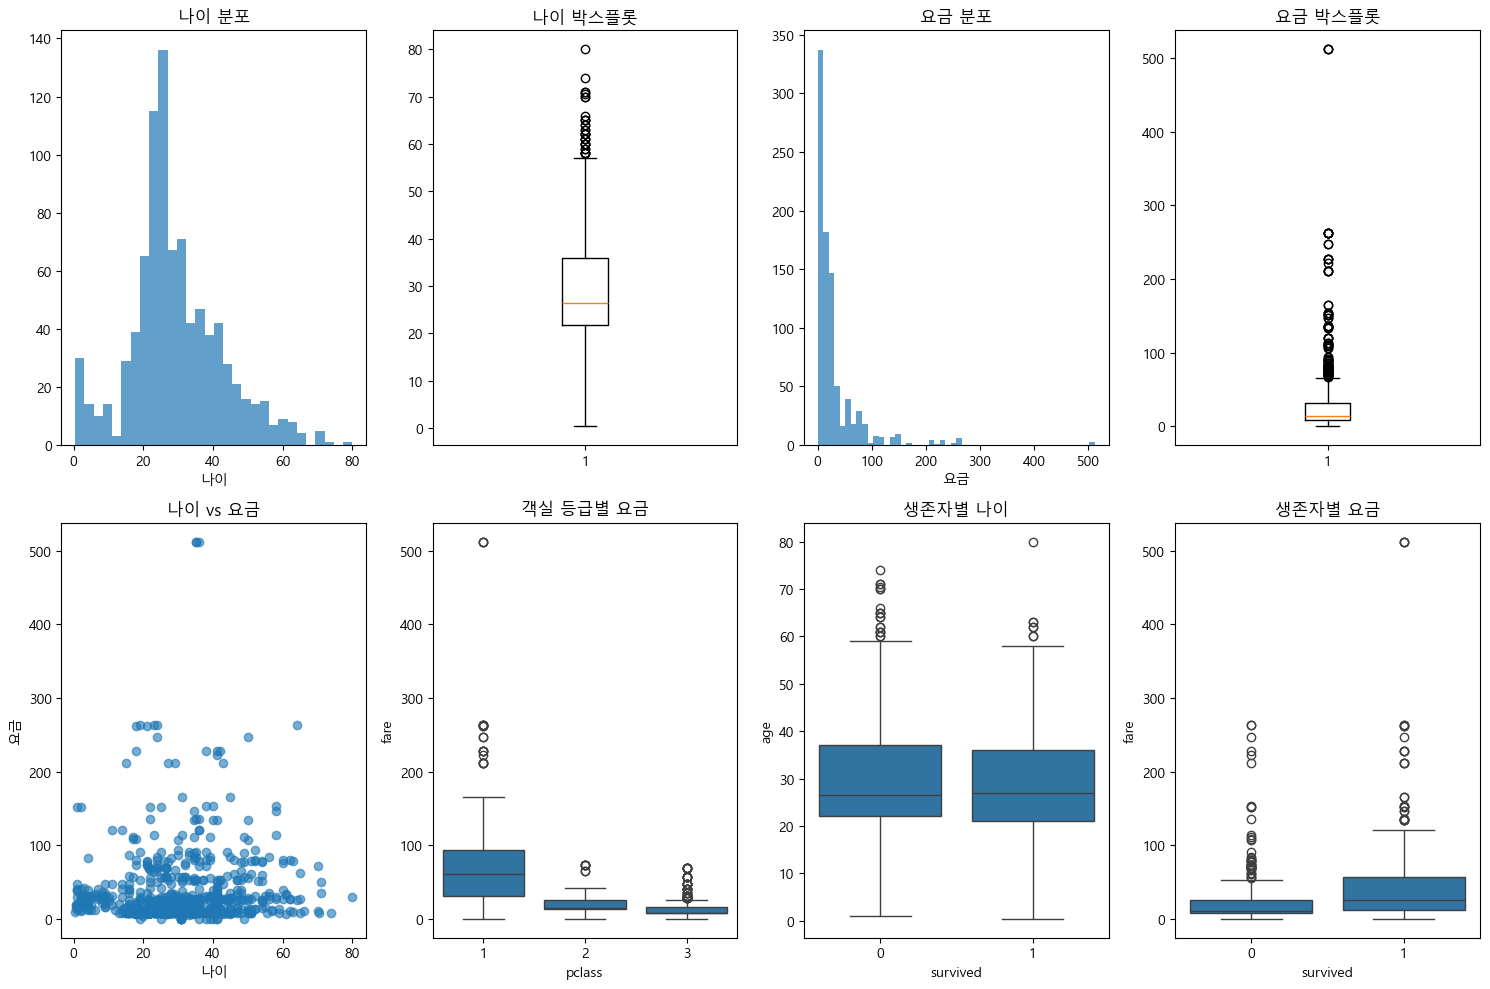

In [26]:
# 결측치 처리 안하면 제대로 시각화 제대로 안나옴

# 1. 이상치 탐지 및 시각화
plt.figure(figsize=(15, 10))

# 나이 분포
plt.subplot(2, 4, 1)
plt.hist(tp['age'], bins=30, alpha=0.7)
plt.title('나이 분포')
plt.xlabel('나이')

plt.subplot(2, 4, 2)
plt.boxplot(tp['age'])
plt.title('나이 박스플롯')

# 요금 분포
plt.subplot(2, 4, 3)
plt.hist(tp['fare'], bins=50, alpha=0.7)
plt.title('요금 분포')
plt.xlabel('요금')

plt.subplot(2, 4, 4)
plt.boxplot(tp['fare'])
plt.title('요금 박스플롯')

# 산점도
plt.subplot(2, 4, 5)
plt.scatter(tp['age'], tp['fare'], alpha=0.6)
plt.xlabel('나이')
plt.ylabel('요금')
plt.title('나이 vs 요금')

# 객실 등급별 요금 분포
plt.subplot(2, 4, 6)
sns.boxplot(x='pclass', y='fare', data=tp)
plt.title('객실 등급별 요금')

# 생존자별 나이 분포
plt.subplot(2, 4, 7)
sns.boxplot(x='survived', y='age', data=tp)
plt.title('생존자별 나이')

# 생존자별 요금 분포
plt.subplot(2, 4, 8)
sns.boxplot(x='survived', y='fare', data=tp)
plt.title('생존자별 요금')

plt.tight_layout()
plt.show()

In [27]:
tp[numeric_cols].describe()

,age,fare
count,891.000000,891.000000
mean,29.318643,32.204208
std,13.281103,49.693429
min,0.420000,0.000000
25%,21.750000,7.910400
50%,26.507589,14.454200
75%,36.000000,31.000000
max,80.000000,512.329200


In [28]:
# 2. 요금 데이터의 이상치 분석
# IQR 방법으로 이상치 탐지
Q1 = tp['fare'].quantile(0.25)
Q3 = tp['fare'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

fare_outliers = (tp['fare'] < lower) | (tp['fare'] > upper)
# 전체 IQR 기준 이상치 개수 / 전체 개수 (%)
fare_outliers.sum() / fare_outliers.count() * 100

np.float64(13.019079685746352)

In [29]:
# 이상치에 해당하는 승객들 특성 분석
outliers_passengers = tp[fare_outliers]
# 객실 등급 분포
print(outliers_passengers['pclass'].value_counts())
# 성별 분포
print(outliers_passengers['sex'].value_counts())
# 생존 여부
print(outliers_passengers['survived'].value_counts())

# 추가로 Grouping 해서 분석도 가능

pclass
1    104
3      7
2      5
Name: count, dtype: int64
sex
female    70
male      46
Name: count, dtype: int64
survived
1    79
0    37
Name: count, dtype: int64


In [ ]:
def detect_outlier_iqr(data_series):
    Q1 = data_series.quantile(0.25)
    Q3 = data_series.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - (1.5*IQR)
    upper_bound = Q3 + (1.5*IQR)
    return (data_series < lower_bound) | (data_series > upper_bound)

outlier_mask = titanic.groupby('pclass')['fare'].transform(detect_outlier_iqr)

In [30]:
# 3. 객실 등급을 고려한 이상치 분석
# 객실 등급별로 요금 이상치 탐지 (전체 기준 이상치가 객실별로는 이상치 아닐 수 있음)

def detect_outliers_by_group(data: pd.DataFrame, group_col: str, value_col: str):
    """그룹별 이상치 탐지"""
    # 우선 전원 모두 이상치 아님(False)
    outliers = pd.Series(False, data.index)
    # 현재 group_col 기준 유니크한 데이터 (pclass -> 1, 2, 3)
    for group in data[group_col].unique():
        # df[df['pclass'] == 3]['fare'] /  df[df['pclass'] == 1]['fare'] ..
        group_data = data[data[group_col] == group][value_col]
        Q1 = group_data.quantile(0.25)        
        Q3 = group_data.quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        group_outliers = (group_data < lower) | (group_data > upper)
        outliers[group_data.index] = group_outliers

    return outliers

In [31]:
# 객실 등급별 이상한 사람들 (T/F mask series)
fare_outliers_by_pclass = detect_outliers_by_group(tp, 'pclass', 'fare')
# 각 등급별로 따로 선별한 이상치 개수
fare_outliers_by_pclass.sum()

np.int64(79)

In [43]:
# 객실 등급별 이상치로 분류된 승객 수
detect_outliers_by_group(tp, 'pclass', 'fare').sum()
# 이상치 승객 중에서 가장 많은 등급(pclass)을 확인하시오
outlier_faremask = detect_outliers_by_group(tp, 'pclass', 'fare')
tp[outlier_faremask]['pclass'].value_counts().idxmax()
# 이상치 승객들의 평균 요금을 구하시오.
tp[outlier_faremask]['fare'].mean()

np.float64(104.816664556962)

In [46]:
# 4. 이상치 처리 방법 적용 및 비교
# 방법 1: 제거
titanic_removed = tp[fare_outliers_by_pclass].copy()

In [52]:
# 방법 2: 윈저화 (95% 백분위수로 제한) [전체]
titanic_winsorized = titanic.copy()
upper_limit = titanic['fare'].quantile(0.95)
upper_limit
titanic_winsorized['fare'] = titanic_winsorized['fare'].clip(upper=upper_limit)
titanic_winsorized['fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: fare, Length: 891, dtype: float64

In [53]:
# 방법 2: 윈저화 (95% 백분위수로 제한)
def winsorize_outliers(data: pd.DataFrame, col, lower=5, upper=95):
    lower_bound = data[col].quantile(lower / 100)
    upper_bound = data[col].quantile(upper / 100)
    data_winsorized = data.copy()
    data_winsorized[col] = data_winsorized[col].clip(lower=lower_bound, upper=upper_bound)
    return data_winsorized

winsorize_outliers(tp, 'fare', 0 , 95)



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.00,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.00,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.00,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.00,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.00,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.00,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.00,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,21.75,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.00,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [55]:
# 방법 3: 객실 등급별 중앙값으로 대체
titanic_replaced = titanic.copy()
for pclass in titanic['pclass'].unique():
    class_data = titanic[titanic['pclass'] == pclass]
    class_median = class_data['fare'].median()
    
    # 해당 등급의 이상치를 중앙값으로 대체
    class_outliers = fare_outliers_by_pclass & (titanic['pclass'] == pclass) # 교집합 - 이상치 탐색 후 나온 결과값
    titanic_replaced.loc[class_outliers, 'fare'] = class_median

In [56]:
titanic_replaced.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [57]:
# 5. 처리 결과 비교
print("\n이상치 처리 결과 비교:")
print("=" * 50)

methods = {
    '원본': titanic['fare'],
    '제거': titanic_removed['fare'],
    '윈저화': titanic_winsorized['fare'],
    '대체': titanic_replaced['fare']
}

comparison_stats = pd.DataFrame()
for method, data in methods.items():
    stats_dict = {
        '데이터수': len(data),
        '평균': data.mean(),
        '중앙값': data.median(),
        '표준편차': data.std(),
        '최대값': data.max()
    }
    comparison_stats[method] = stats_dict

print(comparison_stats.round(2))


이상치 처리 결과 비교:
          원본      제거     윈저화      대체
데이터수  891.00   79.00  891.00  891.00
평균     32.20  104.82   27.72   24.85
중앙값    14.45   56.50   14.45   13.00
표준편차   49.69  114.92   29.23   29.05
최대값   512.33  512.33  112.08  164.87


C:\Users\배성우\AppData\Local\Temp\ipykernel_17804\1909697452.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=['원본', '제거', '윈저화', '대체'])


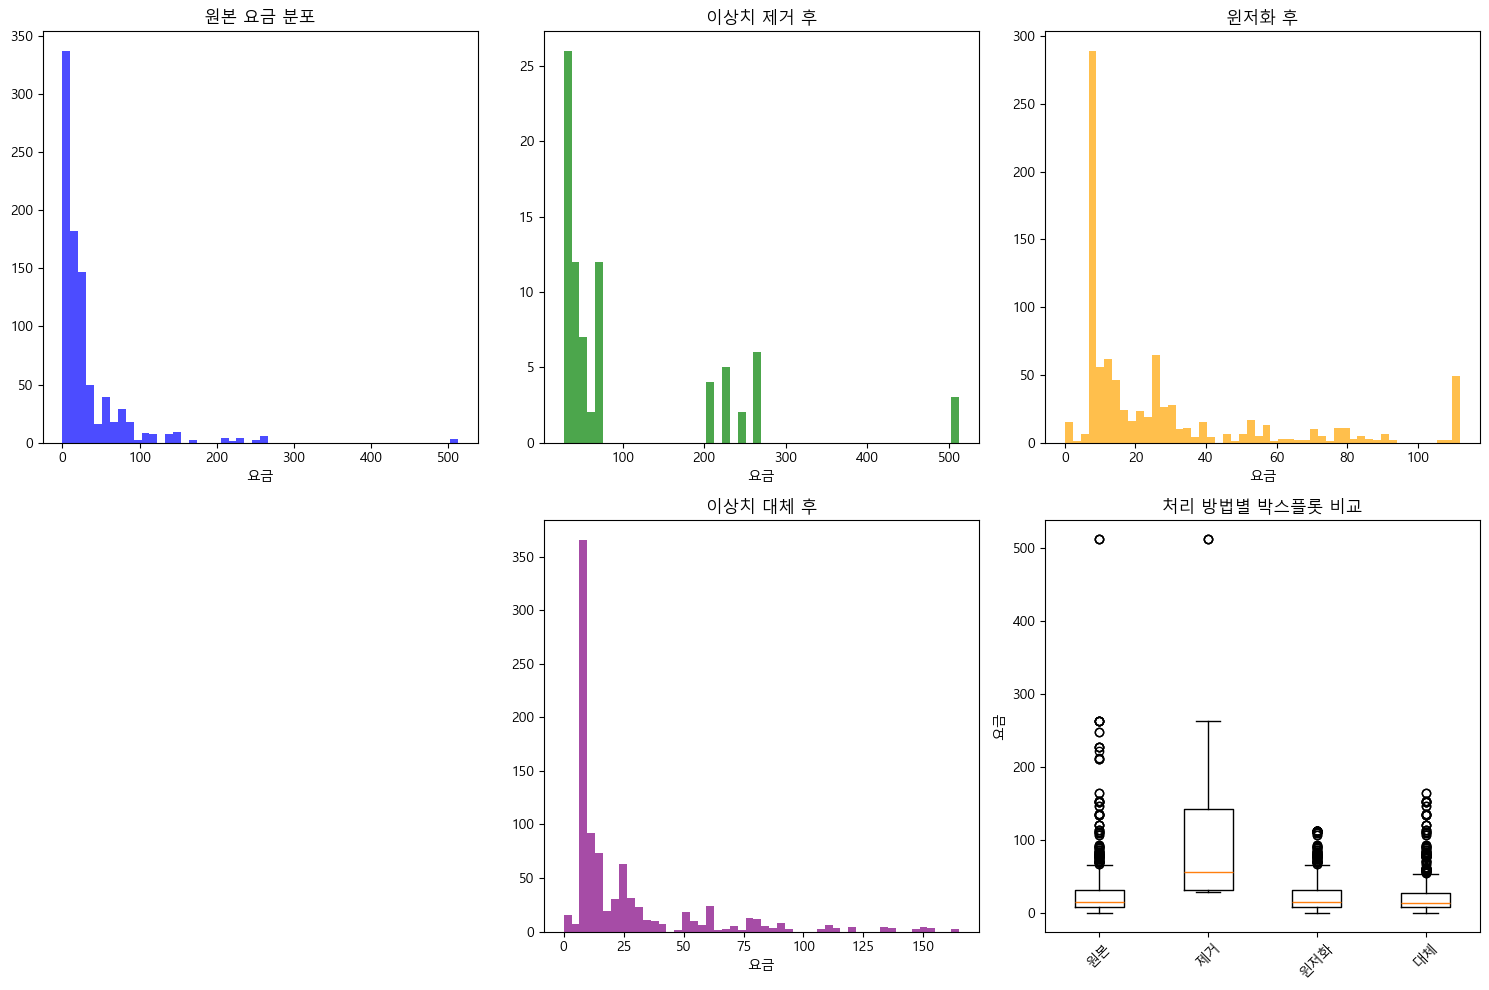

In [58]:
# 6. 시각화: 처리 방법별 분포 비교
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.hist(titanic['fare'], bins=50, alpha=0.7, color='blue')
plt.title('원본 요금 분포')
plt.xlabel('요금')

plt.subplot(2, 3, 2)
plt.hist(titanic_removed['fare'], bins=50, alpha=0.7, color='green')
plt.title('이상치 제거 후')
plt.xlabel('요금')

plt.subplot(2, 3, 3)
plt.hist(titanic_winsorized['fare'], bins=50, alpha=0.7, color='orange')
plt.title('윈저화 후')
plt.xlabel('요금')

plt.subplot(2, 3, 5)
plt.hist(titanic_replaced['fare'], bins=50, alpha=0.7, color='purple')
plt.title('이상치 대체 후')
plt.xlabel('요금')

plt.subplot(2, 3, 6)
# 박스플롯으로 비교
box_data = [
    titanic['fare'].values,
    titanic_removed['fare'].values,
    titanic_winsorized['fare'].values,
    titanic_replaced['fare'].values
]
plt.boxplot(box_data, labels=['원본', '제거', '윈저화', '대체'])
plt.title('처리 방법별 박스플롯 비교')
plt.ylabel('요금')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [59]:
# 7. 이상치 처리가 분석에 미치는 영향 확인
correlation_comparison = pd.DataFrame({
    '원본': [titanic['fare'].corr(titanic['survived'])],
    '제거': [titanic_removed['fare'].corr(titanic_removed['survived'])],
    '윈저화': [titanic_winsorized['fare'].corr(titanic_winsorized['survived'])],
    '대체': [titanic_replaced['fare'].corr(titanic_replaced['survived'])]
}, index=['요금-생존율 상관계수'])

print("\n이상치 처리가 상관관계에 미치는 영향:")
print(correlation_comparison.round(4))


이상치 처리가 상관관계에 미치는 영향:
                 원본      제거     윈저화      대체
요금-생존율 상관계수  0.2573  0.5165  0.3147  0.3443


## EDA 실습 with Titanic

In [17]:
# 타이타닉 데이터셋 불러오기
# (seaborn 기본 내장된 예제 데이터셋)
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore', category=UserWarning)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# titanic 데이터 DataFrame
titanic = sns.load_dataset('titanic')


## 분석 목표
- 타이타닉 승객의 생존에 영향을 준 주요 요인 파악
- 생존율 개선을 위한 안전 정책 수립 근거 마련
- 위험 그룹 식별 및 우선 구조 대상 결정

### 핵심 질문
1. 어떤 승객 특성이 생존에 가장 큰 영향을 미쳤는가?
1. 사회 경제적 지위가 생존에 영향을 미쳤는가?
1. 나이/성별에 따른 생존 패턴은 어떠한가?

In [13]:
# 1. 기본정보 파악(데이터 개요)

# 처음 5개 행 보기
print("타이타닉 데이터 미리보기:")
print(titanic.head())

# 데이터셋 정보 확인
print("\n데이터셋 정보:")
print(titanic.info())

# 데이터 요약 통계
print("\n데이터 요약 통계:")
print(titanic.describe())

# 메모리 사용량
print('\n메모리 사용량:')
print(titanic.memory_usage(deep=True).sum() / 1024 , 'mb')

타이타닉 데이터 미리보기:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

데이터셋 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0 

---생존률 기본 분석---
전체 생존률: 38.4%
생존자: 342, 사망자: 549


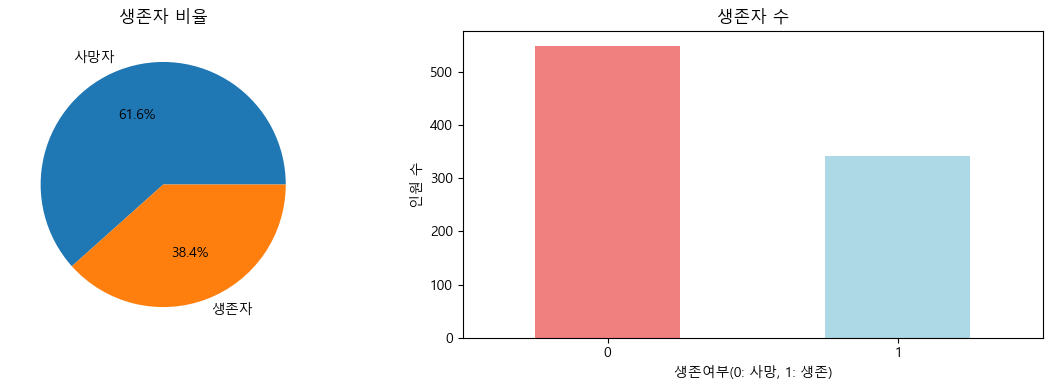

In [46]:
# 2. 생존률 기본 분석
print('---생존률 기본 분석---')
survival_rate = titanic['survived'].mean()
print(f'전체 생존률: {survival_rate:.1%}')

# 생존자/사망자 분포
dead, survivor = titanic['survived'].value_counts()
print(f'생존자: {survivor}, 사망자: {dead}')

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
a1, a2 = axes
# 사망/생존자 파이그래프
s_counts = titanic['survived'].value_counts()
a1.pie(s_counts, labels=('사망자', '생존자'), autopct='%1.1f%%')
a1.set_title('생존자 비율')

# 생존자 막대그래프
s_counts.plot(kind='bar', ax=a2, color=['lightcoral', 'lightblue'])
a2.set_title('생존자 수')
a2.set_xlabel('생존여부(0: 사망, 1: 생존)')
a2.set_ylabel('인원 수')
a2.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

In [16]:
print("=== EDA 가설 및 우선순위 ===")
print("""
주요 가설들:
1. 여성과 어린이 우선 구조 정책 → 성별과 나이가 생존에 중요한 영향
2. 상류층 우대 구조 → 객실 등급(pclass)이 생존율과 연관
3. 가족 단위 행동 → 동반 가족 수(sibsp, parch)가 생존에 영향
4. 승선 위치 → 항구별(Embarked) 생존율 차이 가능성

분석 우선순위:
1순위: pclass, sex, age 
2순위: sibsp, parch, fare
3순위: embarked (부가 정보)
""")

=== EDA 가설 및 우선순위 ===

주요 가설들:
1. 여성과 어린이 우선 구조 정책 → 성별과 나이가 생존에 중요한 영향
2. 상류층 우대 구조 → 객실 등급(pclass)이 생존율과 연관
3. 가족 단위 행동 → 동반 가족 수(sibsp, parch)가 생존에 영향
4. 승선 위치 → 항구별(Embarked) 생존율 차이 가능성

분석 우선순위:
1순위: pclass, sex, age 
2순위: sibsp, parch, fare
3순위: embarked (부가 정보)



=== 객실 등급별 생존율 ===
1 등급: 63.0% - 136 / 216명
2 등급: 47.3% - 87 / 184명
3 등급: 24.2% - 119 / 491명
=== 성별 생존율 ===
female: 74.2% - 233 / 314명
male: 18.9% - 109 / 577명
=== 연령대별 생존율 ===
아동(-12): 58.0% - 40/69명
청소년(13-18): 42.9% - 30/70명
청년(19-35): 38.3% - 137/358명
중장년(36-60): 40.0% - 78/195명
노년(61+): 22.7% - 5/22명
=== 성별 x 객실등급 교차분석 ===
pclass     1     2     3
sex                     
female  96.8  92.1  50.0
male    36.9  15.7  13.5


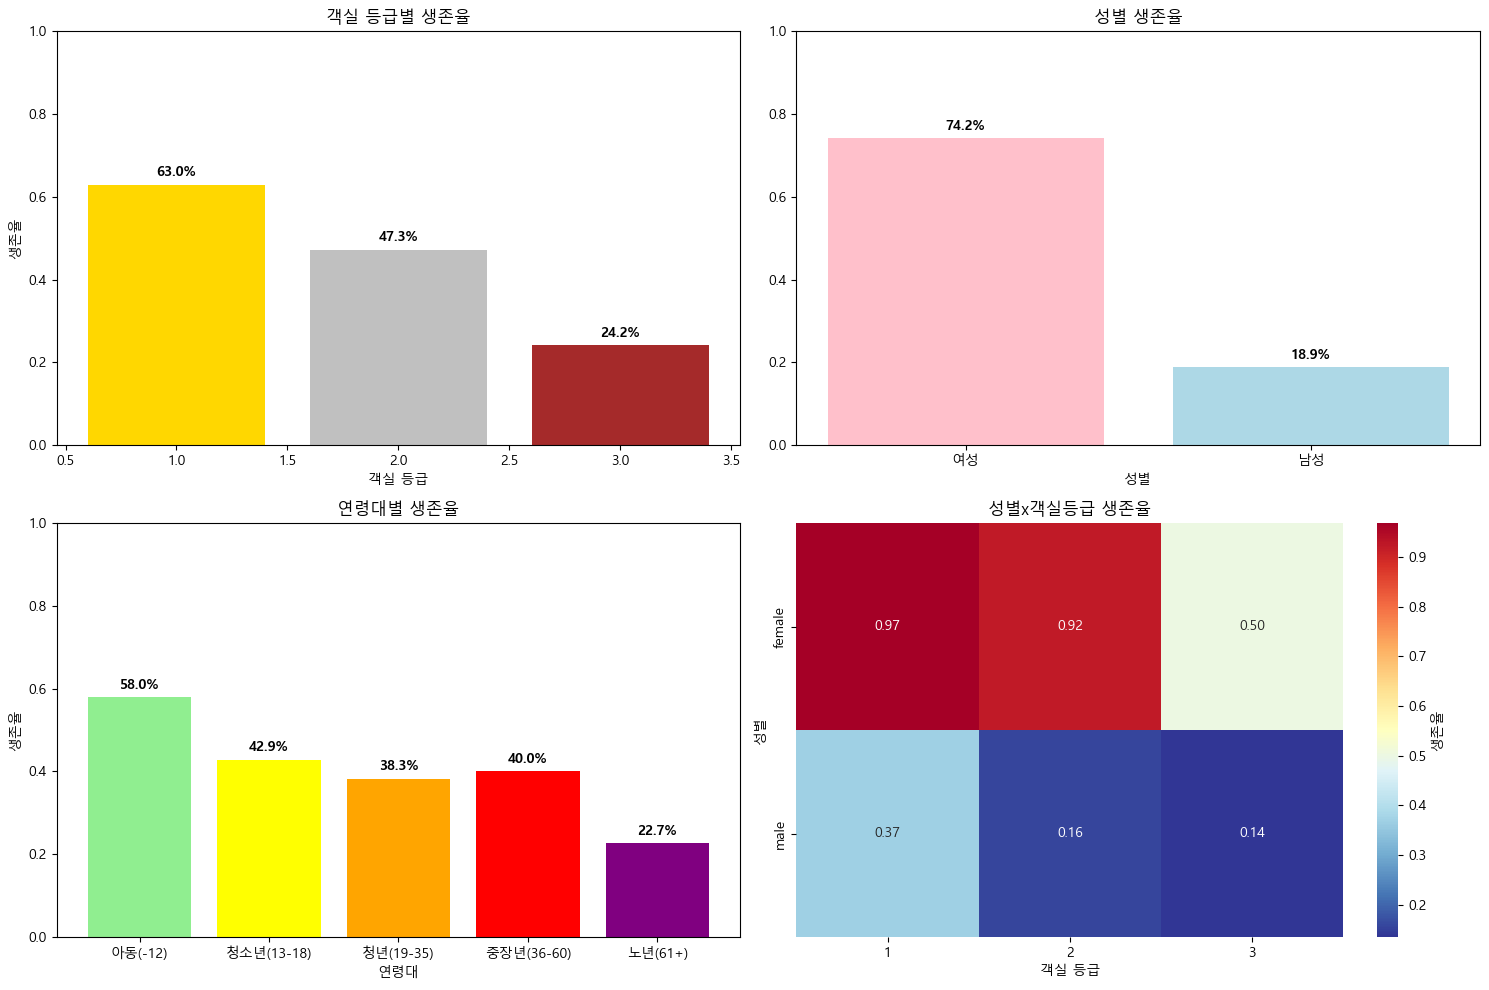

In [50]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
a1, a2, a3, a4 = axes[0, 0], axes[0, 1], axes[1, 0], axes[1, 1]

# 핵심 변수별 생존률 분석
# 1. 객실 등급별 생존률 (총원, 생존, 생존률)
pclass_survival = titanic.groupby('pclass')['survived'].agg(['count', 'sum', 'mean'])

a1.bar(pclass_survival.index, pclass_survival['mean'], color=['gold', 'silver', 'brown'])
a1.set_title('객실 등급별 생존율')
a1.set_xlabel('객실 등급')
a1.set_ylabel('생존율')
a1.set_ylim(0, 1)

for idx, value in enumerate(pclass_survival['mean']):
    #       x좌표,   y좌표
    a1.text(idx+1, value + 0.02, f'{value:.1%}', ha='center', fontweight='bold')

print('=== 객실 등급별 생존율 ===')
for idx, row in pclass_survival.iterrows():
    print(f'{idx} 등급: {row['mean']:.1%} - {row['sum'].astype(int)} / {row['count'].astype(int)}명')


# 1-1. 요금으로 insight를 뽑을 수 있을까? (돈을 특히 많이 낸 사람들의 생존률..?)

# 2. 성별 생존률
sex_survival = titanic.groupby('sex')['survived'].agg(['count', 'sum', 'mean'])
a2.bar(range(len(sex_survival)), sex_survival['mean'], color=['pink', 'lightblue'])
a2.set_title('성별 생존율')
a2.set_xlabel('성별')
a2.set_xticklabels(['여성', '남성'])
a2.set_xticks(range(len(sex_survival)))
a2.set_ylim(0, 1)

for idx, value in enumerate(sex_survival['mean']):
    a2.text(idx, value + 0.02, f'{value:.1%}', ha='center', fontweight='bold')

print('=== 성별 생존율 ===')
for idx, row in sex_survival.iterrows():
    print(f'{idx}: {row['mean']:.1%} - {row['sum'].astype(int)} / {row['count'].astype(int)}명')


# 3. 나이 생존률(연령대 별)
titanic['age_group'] = pd.cut(
    titanic['age'],
    bins=[0, 12, 18, 35, 60, 100,],  # 초과 ~ 이하
    labels=['아동(-12)', '청소년(13-18)', '청년(19-35)', '중장년(36-60)', '노년(61+)',]
)
age_survival = titanic.groupby('age_group')['survived'].agg(['count', 'sum', 'mean']).dropna()

a3.bar(range(len(age_survival)), age_survival['mean'], 
       color=['lightgreen', 'yellow', 'orange', 'red', 'purple'])
a3.set_title('연령대별 생존율')
a3.set_xlabel('연령대')
a3.set_xticks(range(len(age_survival)))
a3.set_xticklabels(age_survival.index)
a3.set_ylim(0, 1)
a3.set_ylabel('생존율')

for idx, value in enumerate(age_survival['mean']):
    a3.text(idx, value + 0.02, f'{value:.1%}', ha='center', fontweight='bold')

print('=== 연령대별 생존율 ===')
for idx, row in age_survival.iterrows():
    print(f'{idx}: {row['mean']:.1%} - {row['sum'].astype(int)}/{row['count'].astype(int)}명')


# 4. 조합 분석: 성별 x 객실등급 -> GroupBy 말고 Crosstab 으로 해보자
#               성별       x         객실등급 ,       생존              율
survival_ct = pd.crosstab(titanic['sex'], titanic['pclass'], titanic['survived'], aggfunc='mean')
sns.heatmap(survival_ct, annot=True, fmt='.2f', cmap='RdYlBu_r',
            ax=a4, cbar_kws={'label': '생존율'})
a4.set_title('성별x객실등급 생존율')
a4.set_xlabel('객실 등급')
a4.set_ylabel('성별')

print('=== 성별 x 객실등급 교차분석 ===')
print(survival_ct.round(3) * 100)

plt.tight_layout()
plt.show()

In [51]:
from scipy.stats import chi2_contingency

# 카이제곱 독립성 검정
sex_survival_ct = pd.crosstab(titanic['sex'], titanic['survived'])
chi2, p_value, dof, expected = chi2_contingency(sex_survival_ct)
'''
chi2 = 카이제곱 통계량
p_value = 유의 확률 (값이 작다 -> 관련이 있다)
- 일반적으로 p_value 가 5%(0.05) 보다 작으면 연관이 있다고 봄

dof = 자유도 (degree of freedom)
exepected = 기대빈도표 (성별-생존이 독립적일때 기대되는 값들)
'''
print(p_value)
if p_value < 0.05:
    print('성별-생존율은 관련 있음')
else:
    print('성별-생존율 관련 없음')

1.1973570627755645e-58
성별-생존율은 관련 있음


In [52]:
# 5. 분석 결과 보고 (인사이트 정리)
print("""
## 1. 주요 가설

* **가설 1**: 여성과 아동이 우선 구조되었을 것이다.
* **가설 2**: 상류층(1등급)이 구조에서 우대받았을 것이다.

---

## 2. 데이터 요약

### 객실 등급별 생존율

* 1등급: 63.0% (136/216)
* 2등급: 47.3% (87/184)
* 3등급: 24.2% (119/491)

→ 등급이 높을수록 생존율이 높음

### 성별 생존율

* 여성: 74.2% (233/314)
* 남성: 18.9% (109/577)

→ 여성 생존율이 남성보다 약 4배 높음

### 연령대별 생존율

* 아동(-12): 58.0%
* 청소년(13-18): 42.9%
* 청년(19-35): 38.3%
* 중장년(36-60): 40.0%
* 노년(61+): 22.7%

→ 아동 생존율이 가장 높고, 고령층으로 갈수록 낮아짐

### 성별 x 객실 등급 생존율 (%)

| 성별 | 1등급   | 2등급   | 3등급   |
| -- | ----- | ----- | ----- |
| 여성 | 96.8% | 92.1% | 50.0% |
| 남성 | 36.9% | 15.7% | 13.5% |

→ 모든 등급에서 여성 생존율이 높음
→ 특히 1등급 여성은 거의 전원 구조

---

## 3. 가설 검정 결과

✅ **가설 1 채택**: 여성과 아동이 실제로 높은 생존율을 보였으며, 우선 구조된 것으로 해석 가능

✅ **가설 2 채택**: 객실 등급이 높을수록 생존율이 뚜렷하게 높아, 상류층 우선 구조가 있었던 것으로 판단

---

## 4. 결론

* 생존은 **성별, 나이, 객실 등급**에 따라 유의미한 차이를 보임
* **여성, 아동, 상류층**이 구조에 있어 우선순위를 가졌음
* 구조 우선 정책과 사회 계층 간 격차가 생존 결과에 강하게 반영됨
""")


## 1. 주요 가설

* **가설 1**: 여성과 아동이 우선 구조되었을 것이다.
* **가설 2**: 상류층(1등급)이 구조에서 우대받았을 것이다.

---

## 2. 데이터 요약

### 객실 등급별 생존율

* 1등급: 63.0% (136/216)
* 2등급: 47.3% (87/184)
* 3등급: 24.2% (119/491)

→ 등급이 높을수록 생존율이 높음

### 성별 생존율

* 여성: 74.2% (233/314)
* 남성: 18.9% (109/577)

→ 여성 생존율이 남성보다 약 4배 높음

### 연령대별 생존율

* 아동(-12): 58.0%
* 청소년(13-18): 42.9%
* 청년(19-35): 38.3%
* 중장년(36-60): 40.0%
* 노년(61+): 22.7%

→ 아동 생존율이 가장 높고, 고령층으로 갈수록 낮아짐

### 성별 x 객실 등급 생존율 (%)

| 성별 | 1등급   | 2등급   | 3등급   |
| -- | ----- | ----- | ----- |
| 여성 | 96.8% | 92.1% | 50.0% |
| 남성 | 36.9% | 15.7% | 13.5% |

→ 모든 등급에서 여성 생존율이 높음
→ 특히 1등급 여성은 거의 전원 구조

---

## 3. 가설 검정 결과

✅ **가설 1 채택**: 여성과 아동이 실제로 높은 생존율을 보였으며, 우선 구조된 것으로 해석 가능

✅ **가설 2 채택**: 객실 등급이 높을수록 생존율이 뚜렷하게 높아, 상류층 우선 구조가 있었던 것으로 판단

---

## 4. 결론

* 생존은 **성별, 나이, 객실 등급**에 따라 유의미한 차이를 보임
* **여성, 아동, 상류층**이 구조에 있어 우선순위를 가졌음
* 구조 우선 정책과 사회 계층 간 격차가 생존 결과에 강하게 반영됨



■ deck/cabin 잔존 컬럼: []

■ 이상치 처리 전/후 요약(IQR 캡핑):
         컬럼  이상치 개수(전)  이상치 개수(후)
4     parch        213          0
5      fare        116          0
2       age         66          0
3     sibsp         46          0
1    pclass          0          0
0  survived          0          0


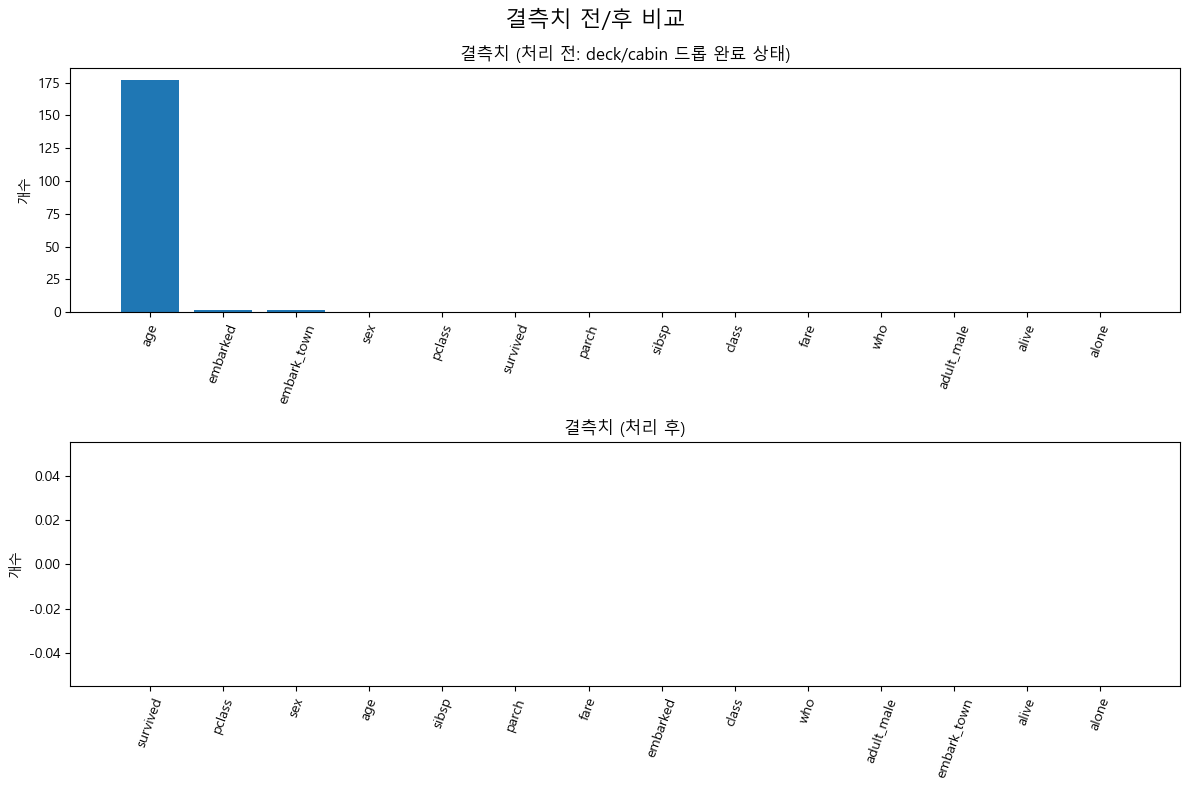


■ 최종 컬럼 목록: ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone']
■ 최종 데이터 크기: (891, 14)


In [ ]:
# 필요하다면, 결측치/ 이상치를 처리한다.
# =========================
# 0) Import & 기본 설정
# =========================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

df = titanic.copy()

# =========================
# 1) 도우미 함수
# =========================
def missing_summary(frame: pd.DataFrame) -> pd.DataFrame:
    cnt = frame.isnull().sum()
    ratio = (cnt / len(frame)) * 100
    out = pd.DataFrame({'결측치 개수': cnt, '결측치 비율(%)': ratio})
    return out.sort_values('결측치 비율(%)', ascending=False)

# =========================
# 2) 'deck/Deck/Cabin' 안전 삭제 + 검증
#    - 대소문자 무시
# =========================
lower_map = {c: c.lower() for c in df.columns}
to_drop = [c for c in df.columns if lower_map[c] in {'deck', 'cabin'}]

if to_drop:
    df.drop(columns=to_drop, inplace=True)

# 추가 검증: 혹시 남았는지 확인
leftover = [c for c in df.columns if c.lower() in {'deck', 'cabin'}]
print("■ deck/cabin 잔존 컬럼:", leftover)  # [] 여야 정상

# =========================
# 3) 결측치 처리 (요청 로직 유지)
#    - Age: Pclass별 평균
#    - 수치형: 평균
#    - 범주형: 최빈
# =========================
missing_before = missing_summary(df)  # <- 드롭 후 기준으로 다시 계산

if 'Age' in df.columns and 'Pclass' in df.columns:
    df['Age'] = df['Age'].fillna(df.groupby('Pclass')['Age'].transform('mean'))
    if df['Age'].isnull().any():
        df['Age'] = df['Age'].fillna(df['Age'].mean())

num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
for col in num_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mean())

cat_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode(dropna=True)
        if len(mode_val) > 0:
            df[col] = df[col].fillna(mode_val.iloc[0])

missing_after = missing_summary(df)   # <- 처리 후 다시 계산

# =========================
# 4) 이상치 탐지/처리 (IQR 캡핑 일괄)
# =========================
def iqr_bounds(s: pd.Series, k=1.5):
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    return q1 - k*iqr, q3 + k*iqr

def cap_with_iqr(s: pd.Series, k=1.5):
    lo, hi = iqr_bounds(s, k)
    return s.clip(lower=lo, upper=hi)

exclude_for_outlier = {'Survived', 'PassengerId'}  # 필요시 조정
num_cols_for_outlier = [c for c in num_cols if c not in exclude_for_outlier]

# 처리 전 개수
out_before = []
for c in num_cols_for_outlier:
    lo, hi = iqr_bounds(df[c])
    out_before.append((c, int(((df[c] < lo) | (df[c] > hi)).sum())))

# 일괄 캡핑
for c in num_cols_for_outlier:
    df[c] = cap_with_iqr(df[c])

# 처리 후 개수
out_after = []
for c in num_cols_for_outlier:
    lo, hi = iqr_bounds(df[c])
    out_after.append((c, int(((df[c] < lo) | (df[c] > hi)).sum())))

out_report = (pd.DataFrame(out_before, columns=['컬럼', '이상치 개수(전)'])
                .merge(pd.DataFrame(out_after, columns=['컬럼', '이상치 개수(후)']),
                       on='컬럼', how='left')
                .sort_values('이상치 개수(전)', ascending=False))
print("\n■ 이상치 처리 전/후 요약(IQR 캡핑):")
print(out_report)

# =========================
# 5) 결측치 전/후 시각화 (deck이 보이면 안 됨)
# =========================
fig, axes = plt.subplots(2, 1, figsize=(12, 8))
fig.suptitle('결측치 전/후 비교', fontsize=16)

mb = missing_before.copy()
mb['컬럼'] = mb.index
axes[0].bar(mb['컬럼'], mb['결측치 개수'])
axes[0].set_title('결측치 (처리 전: deck/cabin 드롭 완료 상태)')
axes[0].set_ylabel('개수')
axes[0].tick_params(axis='x', rotation=70)

ma = missing_after.copy()
ma['컬럼'] = ma.index
axes[1].bar(ma['컬럼'], ma['결측치 개수'])
axes[1].set_title('결측치 (처리 후)')
axes[1].set_ylabel('개수')
axes[1].tick_params(axis='x', rotation=70)

plt.tight_layout()
plt.show()

# =========================
# 6) 최종 결과
# =========================
titanic_clean = df
print("\n■ 최종 컬럼 목록:", list(titanic_clean.columns))
print("■ 최종 데이터 크기:", titanic_clean.shape)


In [ ]:
# 핵심 변수별 생존률 분석
# 1. 객실 등급별 생존률
# 1-1. 요금으로 인사이트를 뽑을 수 있을까? (돈을 특히 많이 낸 사람들의 생존률?)

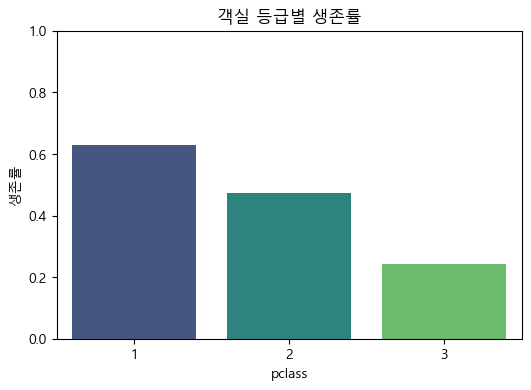

■ 객실 등급별 생존률
   pclass  survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

■ 생존 여부별 요금 통계
   survived       mean  median      max  min
0         0  18.918247    10.5  65.6344  0.0
1         1  32.279511    26.0  65.6344  0.0


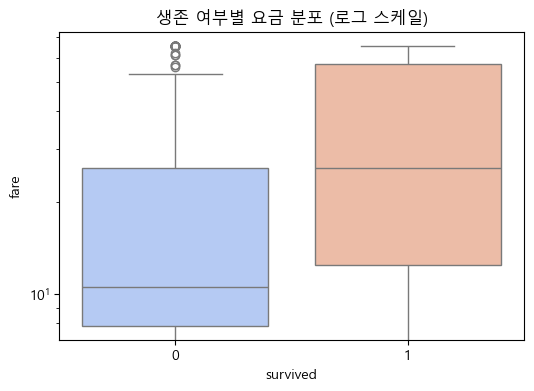

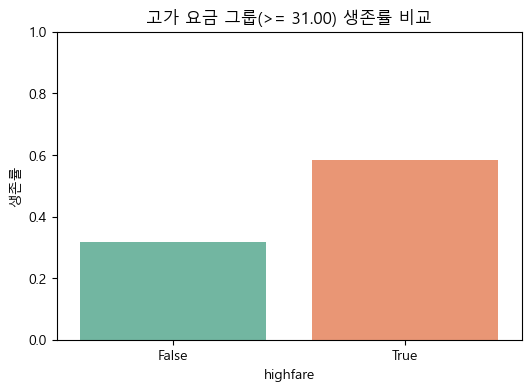


■ 고가 요금 그룹 생존률 비교
   highfare  survived
0     False  0.316817
1      True  0.582222


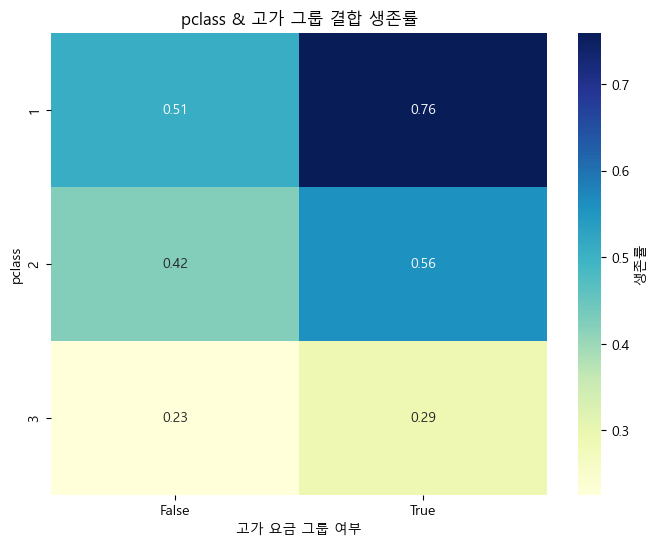


■ pclass & 고가 그룹 결합 생존률
   pclass  highfare_withinclass  survived
0       1                 False  0.508929
1       1                  True  0.759615
2       2                 False  0.422414
3       2                  True  0.558824
4       3                 False  0.225895
5       3                  True  0.289062


In [28]:

df = titanic_clean.copy()

# =========================
# 1) pclass별 생존률
# =========================
pclass_survival = df.groupby('pclass')['survived'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=pclass_survival, x='pclass', y='survived', palette='viridis')
plt.title('객실 등급별 생존률')
plt.ylabel('생존률')
plt.ylim(0,1)
plt.show()

print("■ 객실 등급별 생존률")
print(pclass_survival)

# =========================
# 2) fare와 생존률
# =========================

## (2-1) 생존 여부별 요금 통계
fare_compare = df.groupby('survived')['fare'].agg(['mean','median','max','min']).reset_index()
print("\n■ 생존 여부별 요금 통계")
print(fare_compare)

## (2-2) 박스플롯
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='survived', y='fare', palette='coolwarm')
plt.yscale('log')  # 요금 편차 크므로 로그 변환
plt.title('생존 여부별 요금 분포 (로그 스케일)')
plt.show()

# =========================
# 3) 고가 요금 그룹 분석
# =========================
q3 = df['fare'].quantile(0.75)
df['highfare'] = df['fare'] >= q3

highfare_survival = df.groupby('highfare')['survived'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=highfare_survival, x='highfare', y='survived', palette='Set2')
plt.title(f'고가 요금 그룹(>= {q3:.2f}) 생존률 비교')
plt.ylabel('생존률')
plt.ylim(0,1)
plt.show()

print("\n■ 고가 요금 그룹 생존률 비교")
print(highfare_survival)

# =========================
# 4) pclass + fare 결합 분석
# =========================
df['highfare_withinclass'] = df.groupby('pclass')['fare'] \
                                .transform(lambda x: x >= x.quantile(0.75))

pclass_fare_survival = df.groupby(['pclass','highfare_withinclass'])['survived'].mean().reset_index()

plt.figure(figsize=(8,6))
heatmap_data = pclass_fare_survival.pivot(
    index='pclass',
    columns='highfare_withinclass',
    values='survived'
)
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='YlGnBu', cbar_kws={'label':'생존률'})
plt.title('pclass & 고가 그룹 결합 생존률')
plt.ylabel('pclass')
plt.xlabel('고가 요금 그룹 여부')
plt.show()

print("\n■ pclass & 고가 그룹 결합 생존률")
print(pclass_fare_survival)



In [ ]:
# 2. 성별 생존률

■ 성별별 생존률
      sex  survival_rate
0  female       0.742038
1    male       0.188908

■ 카이제곱 검정 (성별 × 생존여부)
Chi2=260.7170, dof=1, p-value=0.000000

■ 성별×아동 여부 생존률
      sex  child  survival_rate
0  female  False       0.756458
1  female   True       0.651163
2    male  False       0.163873
3    male   True       0.525000

■ 카이제곱 검정 (성별×아동 여부 결합 카테고리 × 생존여부)
Chi2=285.3177, dof=3, p-value=0.000000

■ 성별 × 나이구간(10살) 생존률 (일부 미표본 구간은 NaN일 수 있음)
       sex age_bin10  survival_rate
0   female      0-10       0.633333
1   female     10-20       0.755556
2   female     20-30       0.704000
3   female     30-40       0.833333
4   female     40-50       0.687500
5   female     50-60       0.909091
6     male      0-10       0.593750
7     male     10-20       0.122807
8     male     20-30       0.150735
9     male     30-40       0.214953
10    male     40-50       0.210526
11    male     50-60       0.134615

■ t-test (여성: 생존 vs 사망) — 참고용
t=1.7832, p=0.076656
■ t-test (남성: 생존 vs 사망) — 참고용
t=-2.2

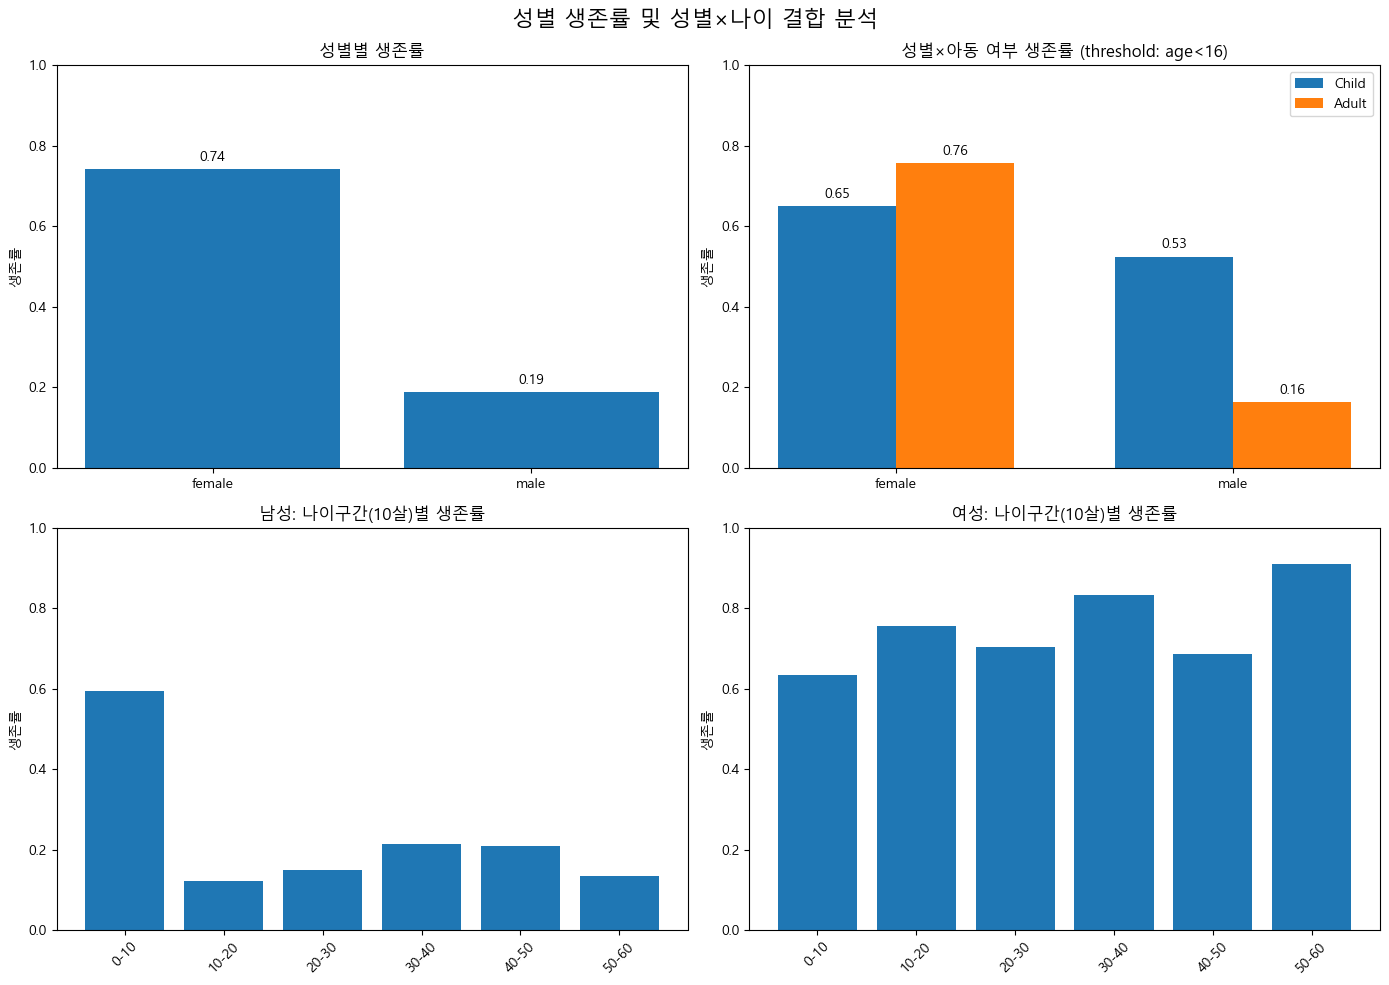

In [30]:
# =========================
# 0) Import & 설정
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, ttest_ind

# 시각화 설정 (Windows 한글 폰트 + 음수표시)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 준비
df = titanic_clean.copy()

# 안전 체크
required_cols = {'sex', 'survived', 'age'}
missing_cols = required_cols - set(df.columns.str.lower())
if missing_cols:
    raise ValueError(f"필수 컬럼이 없습니다: {missing_cols}")

# =========================
# 1) 성별별 생존률
# =========================
sex_survival = (
    df.groupby('sex', as_index=False)['survived']
      .mean()
      .rename(columns={'survived':'survival_rate'})
)

# 카이제곱 검정 (성별 × 생존여부)
ct_sex = pd.crosstab(df['sex'], df['survived'])
chi2_sex, p_sex, dof_sex, exp_sex = chi2_contingency(ct_sex)

print("■ 성별별 생존률")
print(sex_survival)
print("\n■ 카이제곱 검정 (성별 × 생존여부)")
print(f"Chi2={chi2_sex:.4f}, dof={dof_sex}, p-value={p_sex:.6f}")

# =========================
# 2) 성별 × 나이 결합 분석 (여성과 어린이 가설)
# =========================
# (2-1) 아동 기준 생성 (기본: age < 16)
child_threshold = 16
df['child'] = (df['age'] < child_threshold)

# 성별×아동 여부 생존률
sex_child_survival = (
    df.groupby(['sex','child'], as_index=False)['survived']
      .mean()
      .rename(columns={'survived':'survival_rate'})
)

# 카이제곱 검정 (성별×아동 여부 × 생존여부 → 2x2로 구성)
# child는 True/False, sex는 'male'/'female' 가정
ct_sex_child = pd.crosstab([df['sex'], df['child']], df['survived'])
# 2x2 검정을 위해 child와 sex를 결합 카테고리로 보고 독립성 검정
chi2_sc, p_sc, dof_sc, exp_sc = chi2_contingency(ct_sex_child)

print("\n■ 성별×아동 여부 생존률")
print(sex_child_survival)
print("\n■ 카이제곱 검정 (성별×아동 여부 결합 카테고리 × 생존여부)")
print(f"Chi2={chi2_sc:.4f}, dof={dof_sc}, p-value={p_sc:.6f}")

# (2-2) 나이 구간별(10살 단위) 성별 생존률
# 구간 경계는 데이터 상황에 맞게 조정 가능
age_min = max(0, int(np.floor(df['age'].min()/10)*10))
age_max = int(np.ceil(df['age'].max()/10)*10)
bins = list(range(age_min, age_max + 10, 10))  # 0-10, 10-20, ...
labels = [f"{b}-{b+10}" for b in bins[:-1]]
df['age_bin10'] = pd.cut(df['age'], bins=bins, labels=labels, right=False, include_lowest=True)

sex_agebin_survival = (
    df.groupby(['sex','age_bin10'], as_index=False)['survived']
      .mean()
      .rename(columns={'survived':'survival_rate'})
)

print("\n■ 성별 × 나이구간(10살) 생존률 (일부 미표본 구간은 NaN일 수 있음)")
print(sex_agebin_survival.head(12))

# (보너스) 나이 분포 차이 참고용: 성별별로 생존자/사망자 나이 t-test
ages_f_surv = df[(df['sex']=='female') & (df['survived']==1)]['age'].dropna()
ages_f_dead = df[(df['sex']=='female') & (df['survived']==0)]['age'].dropna()
ages_m_surv = df[(df['sex']=='male') & (df['survived']==1)]['age'].dropna()
ages_m_dead = df[(df['sex']=='male') & (df['survived']==0)]['age'].dropna()

t_f, p_f = ttest_ind(ages_f_surv, ages_f_dead, equal_var=False, nan_policy='omit') if len(ages_f_surv) and len(ages_f_dead) else (np.nan, np.nan)
t_m, p_m = ttest_ind(ages_m_surv, ages_m_dead, equal_var=False, nan_policy='omit') if len(ages_m_surv) and len(ages_m_dead) else (np.nan, np.nan)

print("\n■ t-test (여성: 생존 vs 사망) — 참고용")
print(f"t={t_f:.4f}, p={p_f:.6f}")
print("■ t-test (남성: 생존 vs 사망) — 참고용")
print(f"t={t_m:.4f}, p={p_m:.6f}")

# =========================
# 3) 시각화 (모두 서브플롯)
# =========================
# 레이아웃:
# [1,1] 성별별 생존률 바
# [1,2] 성별×아동 생존률 바
# [2,1] 성별별 나이구간(10살) 생존률 (남)
# [2,2] 성별별 나이구간(10살) 생존률 (여)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('성별 생존률 및 성별×나이 결합 분석', fontsize=16)

# (1) 성별별 생존률 바
ax = axes[0, 0]
sexes = sex_survival['sex'].tolist()
rates = sex_survival['survival_rate'].tolist()
ax.bar(sexes, rates)
ax.set_title('성별별 생존률')
ax.set_ylabel('생존률')
ax.set_ylim(0, 1)
for i, v in enumerate(rates):
    ax.text(i, v + 0.02, f"{v:.2f}", ha='center')

# (2) 성별×아동 여부 생존률 바 (True/False를 'Child/Adult'로 표시)
ax = axes[0, 1]
plot_df = sex_child_survival.copy()
plot_df['child_label'] = np.where(plot_df['child'], 'Child', 'Adult')

# x축: sex, 그룹: child_label 두 막대
x_positions = np.arange(plot_df['sex'].nunique())
sex_order = sorted(plot_df['sex'].unique())
bar_width = 0.35

# 남성/여성 별로 child/adult 값을 추출
def get_rate(sex, child_label):
    row = plot_df[(plot_df['sex']==sex) & (plot_df['child_label']==child_label)]
    return float(row['survival_rate'].values[0]) if len(row) else np.nan

male_child = get_rate('male', 'Child')
male_adult = get_rate('male', 'Adult')
female_child = get_rate('female', 'Child')
female_adult = get_rate('female', 'Adult')

# sex 순서 기준으로 막대 좌표 구성
rates_child = [get_rate(s, 'Child') for s in sex_order]
rates_adult = [get_rate(s, 'Adult') for s in sex_order]

ax.bar(x_positions - bar_width/2, rates_child, width=bar_width, label='Child')
ax.bar(x_positions + bar_width/2, rates_adult, width=bar_width, label='Adult')
ax.set_xticks(x_positions)
ax.set_xticklabels(sex_order)
ax.set_ylim(0, 1)
ax.set_title(f'성별×아동 여부 생존률 (threshold: age<{child_threshold})')
ax.set_ylabel('생존률')
ax.legend()
for i, v in enumerate(rates_child):
    if not np.isnan(v):
        ax.text(i - bar_width/2, v + 0.02, f"{v:.2f}", ha='center')
for i, v in enumerate(rates_adult):
    if not np.isnan(v):
        ax.text(i + bar_width/2, v + 0.02, f"{v:.2f}", ha='center')

# (3) 나이구간 성별 생존률 — 남성
ax = axes[1, 0]
male_bins = sex_agebin_survival[sex_agebin_survival['sex']=='male']
# 누락 구간 대비: x 라벨 정렬
x_labels = labels
male_rates = []
for lab in x_labels:
    row = male_bins[male_bins['age_bin10'] == lab]
    male_rates.append(float(row['survival_rate'].values[0]) if len(row) else np.nan)

x_idx = np.arange(len(x_labels))
ax.bar(x_idx, male_rates)
ax.set_xticks(x_idx)
ax.set_xticklabels(x_labels, rotation=45)
ax.set_ylim(0, 1)
ax.set_title('남성: 나이구간(10살)별 생존률')
ax.set_ylabel('생존률')

# (4) 나이구간 성별 생존률 — 여성
ax = axes[1, 1]
female_bins = sex_agebin_survival[sex_agebin_survival['sex']=='female']
female_rates = []
for lab in x_labels:
    row = female_bins[female_bins['age_bin10'] == lab]
    female_rates.append(float(row['survival_rate'].values[0]) if len(row) else np.nan)

x_idx = np.arange(len(x_labels))
ax.bar(x_idx, female_rates)
ax.set_xticks(x_idx)
ax.set_xticklabels(x_labels, rotation=45)
ax.set_ylim(0, 1)
ax.set_title('여성: 나이구간(10살)별 생존률')
ax.set_ylabel('생존률')

plt.tight_layout()
plt.show()

# =========================
# 4) 요약 해석 가이드 (출력값 해석 시)
# =========================
# - p-value(성별×생존) < 0.05 => 성별과 생존여부는 독립이 아님 → 성별이 생존률에 유의한 영향
# - p-value(성별×아동 결합 × 생존) < 0.05 => "여성과/또는 어린이 우선" 패턴이 통계적으로 시사됨
# - 나이구간 그래프: 특정 연령대(특히 아동/청소년)에서 성별 격차가 어떻게 변하는지 확인


In [ ]:
# 3. 나이 생존률(연령대 별)

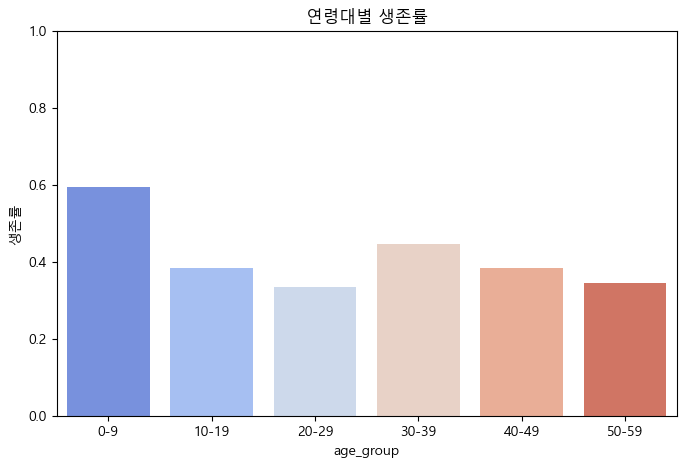

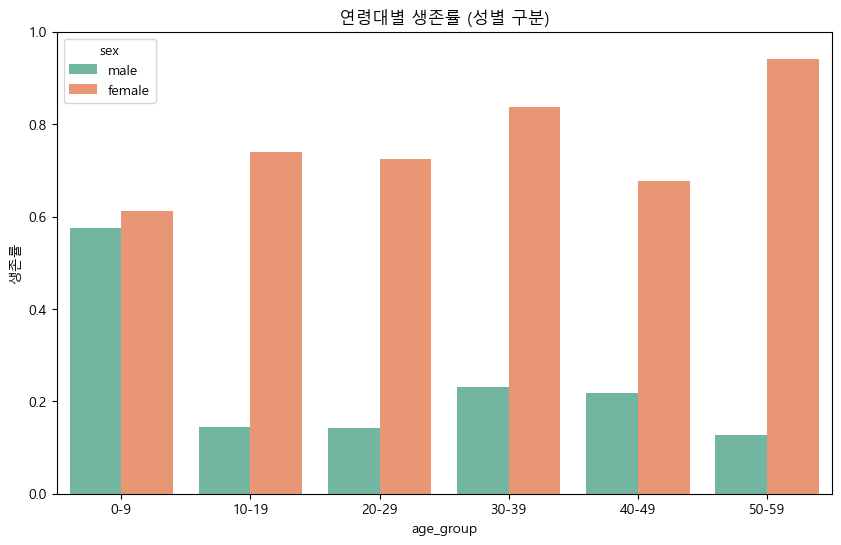

<Figure size 1000x600 with 0 Axes>

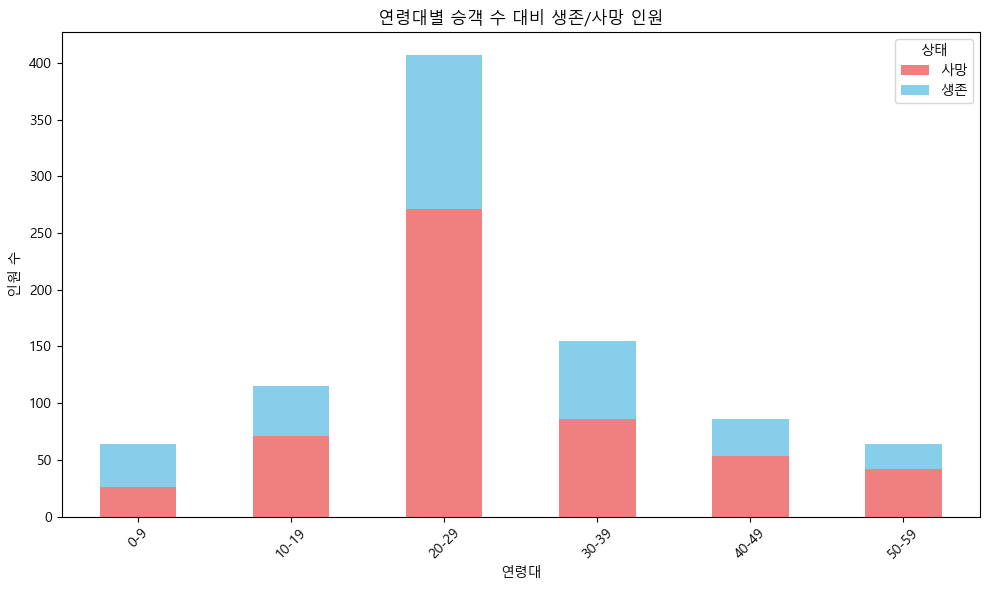

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

df = titanic_clean.copy()

# 1) 연령대 구간 설정 (10살 단위)
bins = range(0, int(df['age'].max()) + 10, 10)
labels = [f"{i}-{i+9}" for i in bins[:-1]]
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

# 2) 연령대별 생존률
age_survival = df.groupby('age_group')['survived'].mean().reset_index()

# ------------------------------
# 시각화 1: 연령대별 생존률 (전체)
plt.figure(figsize=(8,5))
sns.barplot(data=age_survival, x='age_group', y='survived', palette='coolwarm')
plt.title('연령대별 생존률')
plt.ylabel('생존률')
plt.ylim(0, 1)
plt.show()

# ------------------------------
# 시각화 2: 연령대별 생존률 (성별 구분)
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='age_group', y='survived', hue='sex', ci=None, palette='Set2')
plt.title('연령대별 생존률 (성별 구분)')
plt.ylabel('생존률')
plt.ylim(0, 1)
plt.show()

# ------------------------------
# 시각화 3: 연령대별 승객 수 대비 생존자 수 (스택형)
age_counts = df.groupby(['age_group', 'survived']).size().unstack(fill_value=0)
age_counts = age_counts.rename(columns={0: '사망', 1: '생존'})

# 막대그래프 (스택형)
plt.figure(figsize=(10,6))
age_counts[['사망','생존']].plot(
    kind='bar',
    stacked=True,
    color=['lightcoral', 'skyblue'],
    figsize=(10,6)
)
plt.title('연령대별 승객 수 대비 생존/사망 인원')
plt.xlabel('연령대')
plt.ylabel('인원 수')
plt.xticks(rotation=45)
plt.legend(title='상태')
plt.tight_layout()
plt.show()


In [ ]:
# 4. 조합 분석: 성별 X 객실 등급

■ 성별×객실 등급별 생존률
      sex  pclass  survival_rate
0  female       1       0.968085
1  female       2       0.921053
2  female       3       0.500000
3    male       1       0.368852
4    male       2       0.157407
5    male       3       0.135447


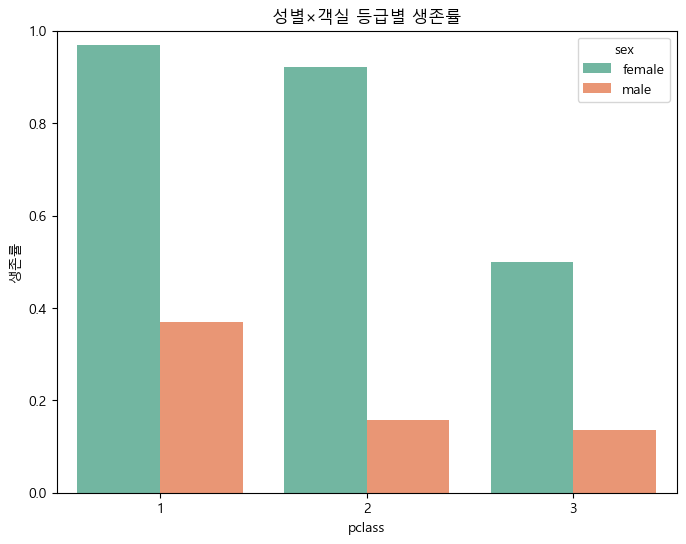

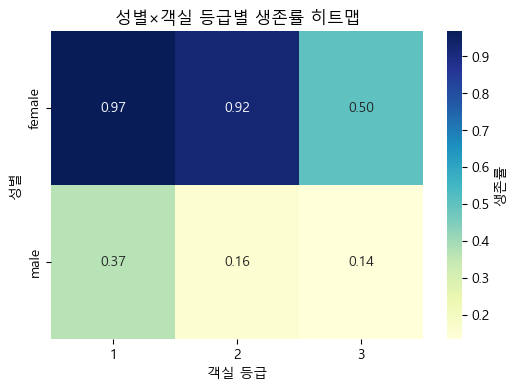


■ 성별×객실 등급별 승객 수 & 생존자 수
      sex  pclass  승객 수  생존자 수       생존률
0  female       1    94     91  0.968085
1  female       2    76     70  0.921053
2  female       3   144     72  0.500000
3    male       1   122     45  0.368852
4    male       2   108     17  0.157407
5    male       3   347     47  0.135447

■ 카이제곱 검정 결과 (성별×등급 조합 vs 생존여부)
Chi2 통계량: 350.6753
자유도: 5
p-value: 0.000000
➡ 성별×등급 조합과 생존여부는 통계적으로 유의하게 관련 있음 (귀무가설 기각)


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# 한글 폰트 (Windows)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

df = titanic_clean.copy()

# 1) 성별×객실 등급별 생존률 계산
sex_pclass_survival = (
    df.groupby(['sex','pclass'])['survived']
      .mean()
      .reset_index()
      .rename(columns={'survived':'survival_rate'})
)

print("■ 성별×객실 등급별 생존률")
print(sex_pclass_survival)

# 2) 시각화 1 - 그룹형 막대그래프
plt.figure(figsize=(8,6))
sns.barplot(data=sex_pclass_survival, x='pclass', y='survival_rate', hue='sex', palette='Set2')
plt.title('성별×객실 등급별 생존률')
plt.ylabel('생존률')
plt.ylim(0, 1)
plt.show()

# 3) 시각화 2 - 히트맵
heatmap_data = sex_pclass_survival.pivot(index='sex', columns='pclass', values='survival_rate')

plt.figure(figsize=(6,4))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='YlGnBu', cbar_kws={'label':'생존률'})
plt.title('성별×객실 등급별 생존률 히트맵')
plt.ylabel('성별')
plt.xlabel('객실 등급')
plt.show()

# 4) 성별×객실 등급별 승객 수 & 생존자 수
count_table = df.groupby(['sex','pclass'])['survived'].agg(['count','sum']).reset_index()
count_table = count_table.rename(columns={'count':'승객 수', 'sum':'생존자 수'})
count_table['생존률'] = count_table['생존자 수'] / count_table['승객 수']
print("\n■ 성별×객실 등급별 승객 수 & 생존자 수")
print(count_table)

# 5) 카이제곱 검정 (성별+객실등급 조합 × 생존여부)
# sex와 pclass를 결합하여 새로운 범주형 변수 생성
df['sex_pclass'] = df['sex'] + "_class" + df['pclass'].astype(str)

# 교차표
ct = pd.crosstab(df['sex_pclass'], df['survived'])

# 카이제곱 검정
chi2, p, dof, expected = chi2_contingency(ct)

print("\n■ 카이제곱 검정 결과 (성별×등급 조합 vs 생존여부)")
print(f"Chi2 통계량: {chi2:.4f}")
print(f"자유도: {dof}")
print(f"p-value: {p:.6f}")

if p < 0.05:
    print("➡ 성별×등급 조합과 생존여부는 통계적으로 유의하게 관련 있음 (귀무가설 기각)")
else:
    print("➡ 성별×등급 조합과 생존여부는 통계적으로 유의한 관련 없음 (귀무가설 채택)")


In [ ]:
# sibsp/parch(가족 동반 여부) 분석

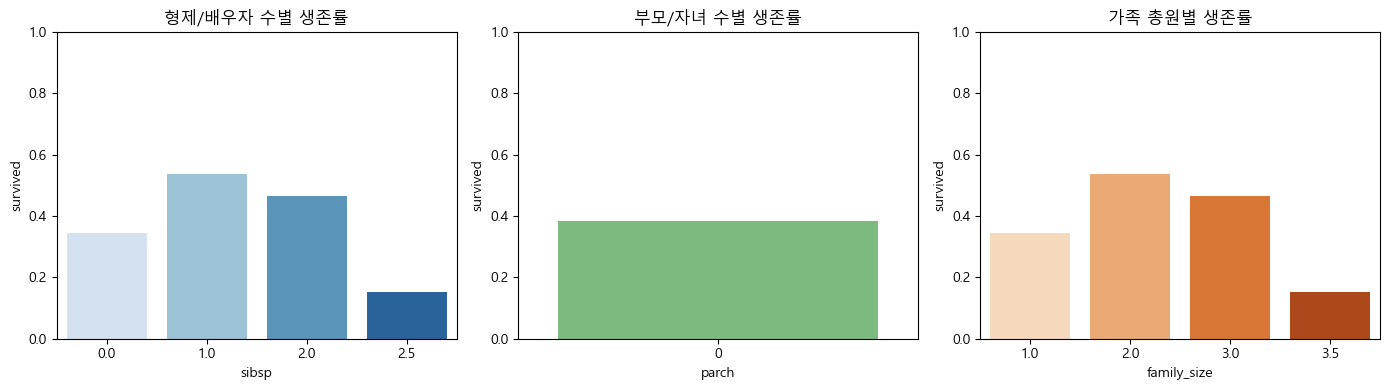


■ 카이제곱 검정 결과 (가족 총원 vs 생존여부)
Chi2 통계량: 35.4334
자유도: 3
p-value: 0.000000
➡ 가족 총원과 생존여부는 통계적으로 유의하게 관련 있음 (귀무가설 기각)


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

df = titanic_clean.copy()

# 1) sibsp별 생존률
sibsp_survival = df.groupby('sibsp')['survived'].mean().reset_index()

# 2) parch별 생존률
parch_survival = df.groupby('parch')['survived'].mean().reset_index()

# 3) 가족 총원(family_size) 변수 생성 (본인 포함)
df['family_size'] = df['sibsp'] + df['parch'] + 1
family_survival = df.groupby('family_size')['survived'].mean().reset_index()

# =========================
# 시각화 1: sibsp vs 생존률
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
sns.barplot(data=sibsp_survival, x='sibsp', y='survived', palette='Blues')
plt.title('형제/배우자 수별 생존률')
plt.ylim(0, 1)

# 시각화 2: parch vs 생존률
plt.subplot(1,3,2)
sns.barplot(data=parch_survival, x='parch', y='survived', palette='Greens')
plt.title('부모/자녀 수별 생존률')
plt.ylim(0, 1)

# 시각화 3: family_size vs 생존률
plt.subplot(1,3,3)
sns.barplot(data=family_survival, x='family_size', y='survived', palette='Oranges')
plt.title('가족 총원별 생존률')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

# =========================
# 4) 카이제곱 검정 (가족 총원 × 생존여부)
# family_size를 범주형으로 취급
ct_family = pd.crosstab(df['family_size'], df['survived'])
chi2, p, dof, expected = chi2_contingency(ct_family)

print("\n■ 카이제곱 검정 결과 (가족 총원 vs 생존여부)")
print(f"Chi2 통계량: {chi2:.4f}")
print(f"자유도: {dof}")
print(f"p-value: {p:.6f}")

if p < 0.05:
    print("➡ 가족 총원과 생존여부는 통계적으로 유의하게 관련 있음 (귀무가설 기각)")
else:
    print("➡ 가족 총원과 생존여부는 통계적으로 유의한 관련 없음 (귀무가설 채택)")


In [ ]:
# Embarked(승선 항구) 별 생존률

■ 승선 항구별 생존률
  embarked  survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


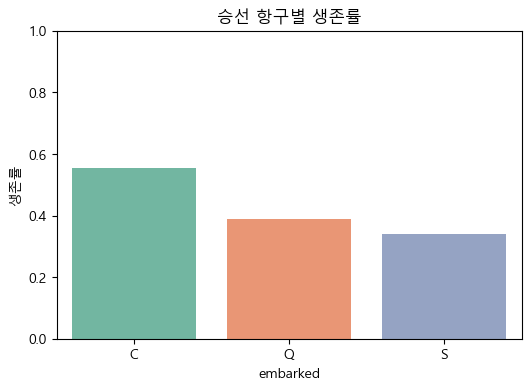


■ 카이제곱 검정 결과 (승선 항구 vs 생존여부)
Chi2 통계량: 25.9645
자유도: 2
p-value: 0.000002
➡ 승선 항구와 생존여부는 통계적으로 유의하게 관련 있음 (귀무가설 기각)


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

df = titanic_clean.copy()

# 1) embarked별 생존률 계산
embarked_survival = df.groupby('embarked')['survived'].mean().reset_index()

print("■ 승선 항구별 생존률")
print(embarked_survival)

# 2) 시각화
plt.figure(figsize=(6,4))
sns.barplot(data=embarked_survival, x='embarked', y='survived', palette='Set2')
plt.title('승선 항구별 생존률')
plt.ylabel('생존률')
plt.ylim(0, 1)
plt.show()

# 3) 카이제곱 검정
ct_embarked = pd.crosstab(df['embarked'], df['survived'])
chi2, p, dof, expected = chi2_contingency(ct_embarked)

print("\n■ 카이제곱 검정 결과 (승선 항구 vs 생존여부)")
print(f"Chi2 통계량: {chi2:.4f}")
print(f"자유도: {dof}")
print(f"p-value: {p:.6f}")

if p < 0.05:
    print("➡ 승선 항구와 생존여부는 통계적으로 유의하게 관련 있음 (귀무가설 기각)")
else:
    print("➡ 승선 항구와 생존여부는 통계적으로 유의한 관련 없음 (귀무가설 채택)")


In [ ]:
# 5. 분석결과 보고

## 0) 공통 설정 & 유틸

In [37]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, ttest_ind

# Windows 한글 폰트 및 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (8, 5)

# 데이터 복사
df = titanic_clean.copy()

# 안전 확인
required = {'pclass','sex','age','sibsp','parch','fare','embarked','survived'}
missing = required - set(df.columns)
if missing:
    raise ValueError(f"누락 컬럼: {missing}. 전처리부터 확인하세요.")

def chi2_pvalue(index_series, target_series):
    """교차표 기반 카이제곱 p-value와 교차표 반환"""
    ct = pd.crosstab(index_series, target_series)
    chi2, p, dof, expected = chi2_contingency(ct)
    return p, ct

def add_value_labels(ax, spacing=0.01, fmt="{:.2f}"):
    """막대 위 값 라벨 달기 (matplotlib 전용)"""
    for rect in ax.patches:
        h = rect.get_height()
        if pd.isna(h): 
            continue
        ax.text(rect.get_x() + rect.get_width()/2, h + spacing, fmt.format(h),
                ha='center', va='bottom', fontsize=9)

p-value < 0.05: 변수와 생존여부 관련 있음(귀무가설 기각)

성별/등급/요금: 전반적으로 유의. 여성·1등급·고가 요금일수록 생존률 ↑

가족 규모: 2~4인 소규모에서 생존률 상대적 우위.

연령대: 어린이(0~15) 생존률 ↑, 성인 남성 일부 구간 생존률 ↓ 경향.

항구: 항구별 차이는 **승객 구성(Pclass, Sex)**의 간접 영향 가능—다변량 분석으로 보완 추천.

## 1) Pclass & Fare (상류층/고가요금 가설)

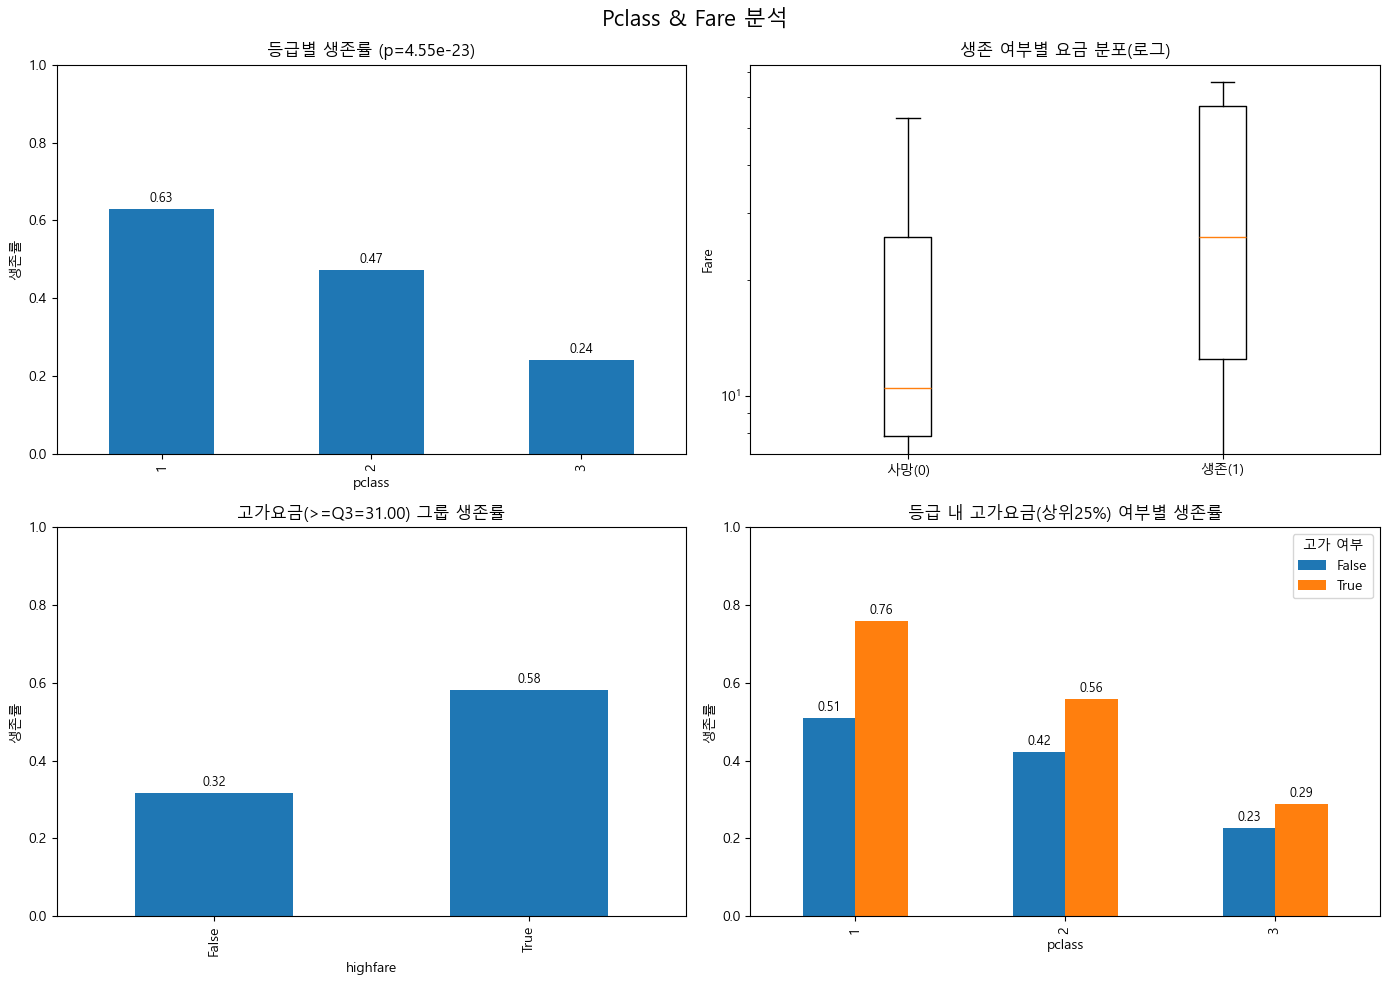

,분석,p-value
0,pclass × survived 카이제곱 p-value,4.549252e-23


,mean,median,min,max,count
survived,,,,,
0,18.918247,10.5,0.0,65.6344,549
1,32.279511,26.0,0.0,65.6344,342


In [38]:

# 1) pclass별 생존률
pclass_survival = df.groupby('pclass')['survived'].mean()

# 2) 생존/사망 그룹의 요금 통계
fare_stats = df.groupby('survived')['fare'].agg(['mean','median','min','max','count'])

# 3) 고가요금(전체 상위 25%)
q3 = df['fare'].quantile(0.75)
df['highfare'] = df['fare'] >= q3
highfare_survival = df.groupby('highfare')['survived'].mean()

# 4) 각 등급 내 고가요금(등급별 상위 25%)
df['highfare_withinclass'] = df.groupby('pclass')['fare'].transform(lambda s: s >= s.quantile(0.75))
pclass_highfare = df.groupby(['pclass','highfare_withinclass'])['survived'].mean().unstack()

# 5) 카이제곱 (pclass × survived)
p_pclass, ct_pclass = chi2_pvalue(df['pclass'], df['survived'])

# ---- 시각화 (2x2) ----
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Pclass & Fare 분석', fontsize=16)

# (1) pclass별 생존률
ax = axes[0,0]
pclass_survival.plot(kind='bar', ax=ax)
ax.set_title(f'등급별 생존률 (p={p_pclass:.3g})')
ax.set_ylim(0,1); ax.set_ylabel('생존률')
add_value_labels(ax)

# (2) 생존/사망 요금 박스플롯 (로그축)
ax = axes[0,1]
group0 = df[df['survived']==0]['fare'].dropna()
group1 = df[df['survived']==1]['fare'].dropna()
ax.boxplot([group0, group1], labels=['사망(0)','생존(1)'], showfliers=False)
ax.set_yscale('log'); ax.set_title('생존 여부별 요금 분포(로그)'); ax.set_ylabel('Fare')

# (3) 고가요금(전체 상위 25%) 생존률
ax = axes[1,0]
highfare_survival.plot(kind='bar', ax=ax)
ax.set_title(f'고가요금(>=Q3={q3:.2f}) 그룹 생존률')
ax.set_ylim(0,1); ax.set_ylabel('생존률')
add_value_labels(ax)

# (4) 등급 내 고가요금 여부 생존률
ax = axes[1,1]
pclass_highfare.plot(kind='bar', ax=ax)
ax.set_title('등급 내 고가요금(상위25%) 여부별 생존률')
ax.set_ylim(0,1); ax.set_ylabel('생존률')
ax.legend(title='고가 여부'); add_value_labels(ax)

plt.tight_layout(); plt.show()

display(pd.DataFrame({
    '분석': ['pclass × survived 카이제곱 p-value'],
    'p-value': [p_pclass]
}))
display(fare_stats.head())


## 2) 성별 (여성 우선 가설)

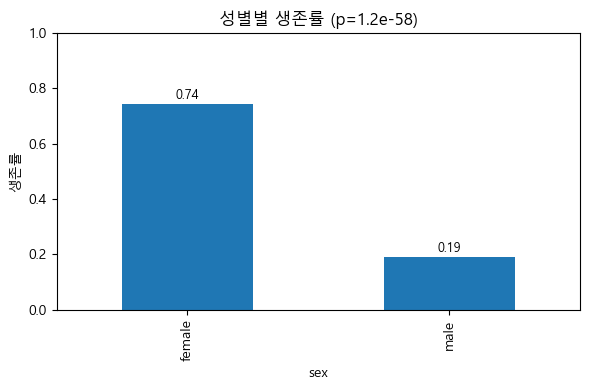

survived,0,1
sex,,
female,81,233
male,468,109


In [39]:

sex_surv = df.groupby('sex')['survived'].mean()
p_sex, ct_sex = chi2_pvalue(df['sex'], df['survived'])

fig, ax = plt.subplots(1,1, figsize=(6,4))
sex_surv.plot(kind='bar', ax=ax)
ax.set_title(f'성별별 생존률 (p={p_sex:.3g})')
ax.set_ylim(0,1); ax.set_ylabel('생존률')
add_value_labels(ax)
plt.tight_layout(); plt.show()

display(ct_sex)

## 3) 연령대 (어린이/연령대 가설)

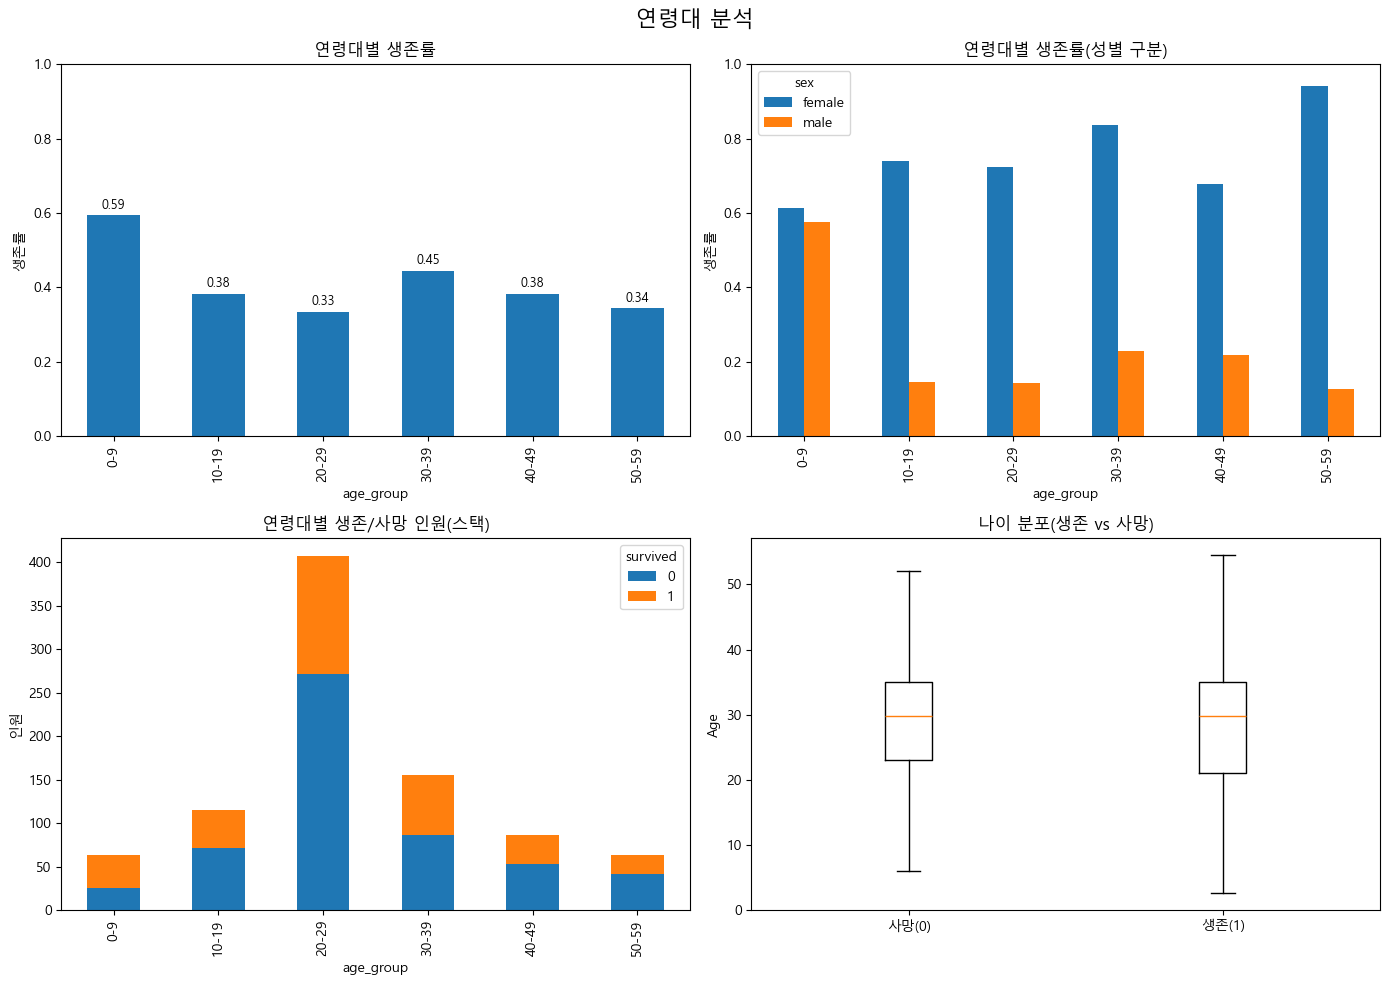

In [40]:
# 연령대(10살 단위) 생성
age_max = int(np.ceil(df['age'].max()/10)*10)
bins = list(range(0, age_max+10, 10))
labels = [f"{b}-{b+9}" for b in bins[:-1]]
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True, include_lowest=True)

# 연령대별 생존률
age_surv = df.groupby('age_group')['survived'].mean()

# 연령대×성별 생존률
age_sex_surv = df.groupby(['age_group','sex'])['survived'].mean().unstack()

# 연령대별 생존/사망 인원 (스택)
age_counts = df.groupby(['age_group','survived']).size().unstack(fill_value=0)

# ---- 시각화 (2x2) ----
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('연령대 분석', fontsize=16)

# (1) 연령대별 생존률
ax = axes[0,0]
age_surv.plot(kind='bar', ax=ax)
ax.set_title('연령대별 생존률'); ax.set_ylim(0,1); ax.set_ylabel('생존률')
add_value_labels(ax)

# (2) 연령대별 생존률(성별 구분)
ax = axes[0,1]
age_sex_surv.plot(kind='bar', ax=ax)
ax.set_title('연령대별 생존률(성별 구분)'); ax.set_ylim(0,1); ax.set_ylabel('생존률')
ax.legend(title='sex')

# (3) 연령대별 승객 수 대비 생존/사망(스택)
ax = axes[1,0]
age_counts.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('연령대별 생존/사망 인원(스택)'); ax.set_ylabel('인원'); ax.legend(title='survived')

# (4) 참고: 생존 vs 사망 나이 분포 요약
ax = axes[1,1]
dead_age = df.loc[df['survived']==0, 'age'].dropna()
surv_age = df.loc[df['survived']==1, 'age'].dropna()
ax.boxplot([dead_age, surv_age], labels=['사망(0)','생존(1)'], showfliers=False)
ax.set_title('나이 분포(생존 vs 사망)'); ax.set_ylabel('Age')

plt.tight_layout(); plt.show()


## 4) 성별 × Pclass (조합 효과)

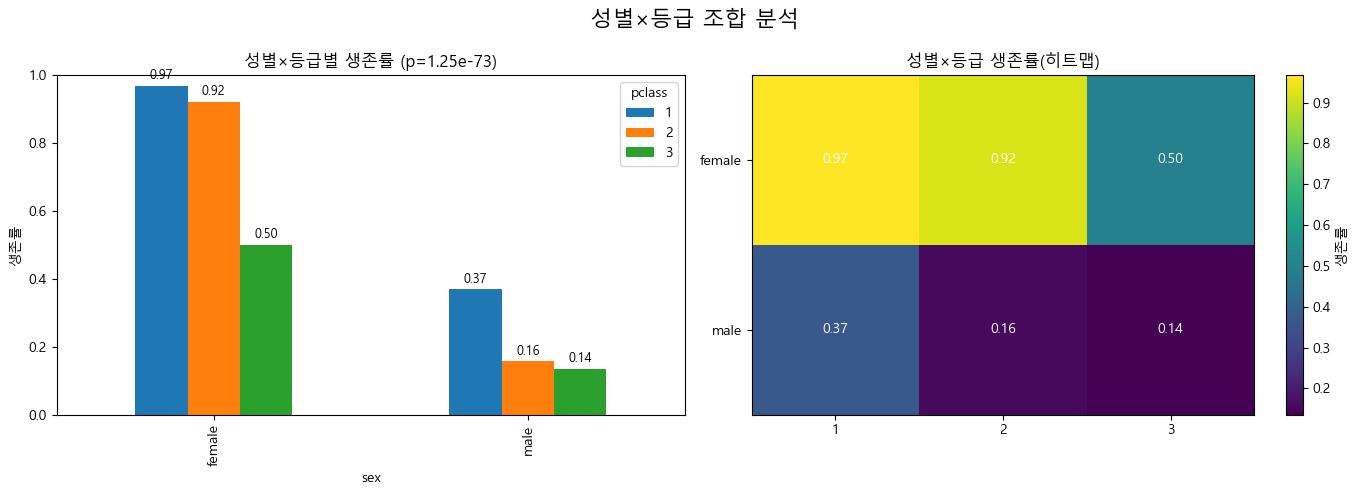

survived,0,1
row_0,,
female_c1,3,91
female_c2,6,70
female_c3,72,72
male_c1,77,45
male_c2,91,17
male_c3,300,47


In [41]:
sex_pclass_surv = df.groupby(['sex','pclass'])['survived'].mean().unstack()
p_sex_pclass, ct_sex_pclass = chi2_pvalue(df['sex'].astype(str) + "_c" + df['pclass'].astype(str), df['survived'])

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('성별×등급 조합 분석', fontsize=16)

# (1) 그룹 막대
ax = axes[0]
sex_pclass_surv.plot(kind='bar', ax=ax)
ax.set_title(f'성별×등급별 생존률 (p={p_sex_pclass:.3g})')
ax.set_ylim(0,1); ax.set_ylabel('생존률')
ax.legend(title='pclass'); add_value_labels(ax)

# (2) 히트맵 유사 표현 (matplotlib 기본)
ax = axes[1]
im = ax.imshow(sex_pclass_surv.values, aspect='auto')
ax.set_xticks(range(sex_pclass_surv.shape[1])); ax.set_xticklabels(sex_pclass_surv.columns)
ax.set_yticks(range(sex_pclass_surv.shape[0])); ax.set_yticklabels(sex_pclass_surv.index)
ax.set_title('성별×등급 생존률(히트맵)')
for i in range(sex_pclass_surv.shape[0]):
    for j in range(sex_pclass_surv.shape[1]):
        ax.text(j, i, f"{sex_pclass_surv.values[i,j]:.2f}", ha='center', va='center', color='w')
plt.colorbar(im, ax=axes[1], label='생존률')

plt.tight_layout(); plt.show()

display(ct_sex_pclass)


## 5) 가족 동반 (sibsp, parch, family_size)

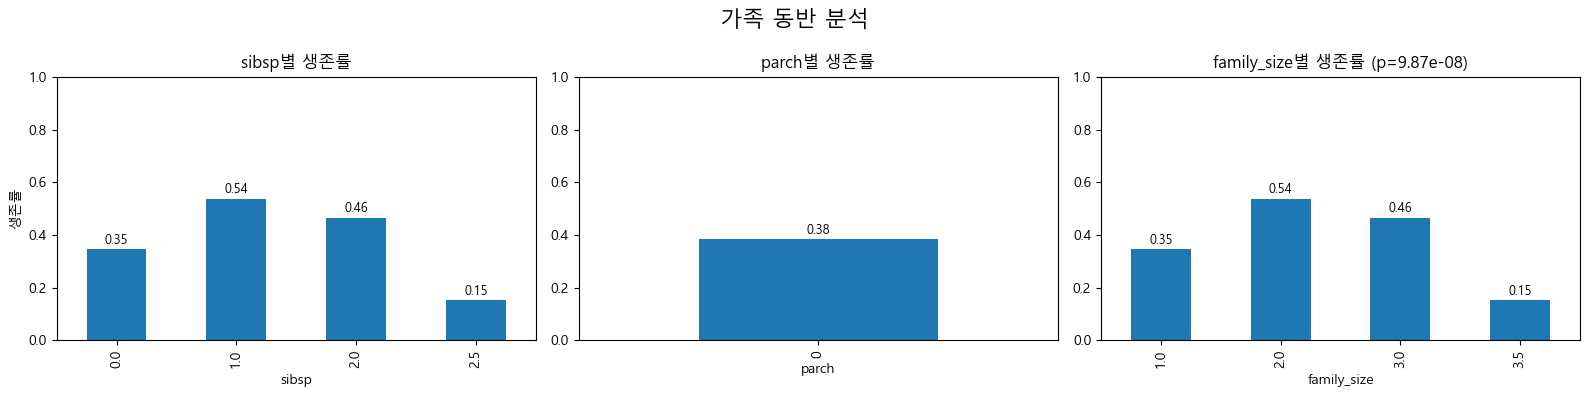

survived,0,1
family_size,,
1.0,398,210
2.0,97,112
3.0,15,13
3.5,39,7


In [42]:

# 가족 총원
df['family_size'] = df['sibsp'] + df['parch'] + 1

sibsp_surv = df.groupby('sibsp')['survived'].mean()
parch_surv = df.groupby('parch')['survived'].mean()
family_surv = df.groupby('family_size')['survived'].mean()

# 카이제곱 (family_size × survived)
p_family, ct_family = chi2_pvalue(df['family_size'], df['survived'])

fig, axes = plt.subplots(1, 3, figsize=(16, 4))
fig.suptitle('가족 동반 분석', fontsize=16)

ax = axes[0]; sibsp_surv.plot(kind='bar', ax=ax); ax.set_ylim(0,1); ax.set_title('sibsp별 생존률'); ax.set_ylabel('생존률'); add_value_labels(ax)
ax = axes[1]; parch_surv.plot(kind='bar', ax=ax); ax.set_ylim(0,1); ax.set_title('parch별 생존률'); add_value_labels(ax)
ax = axes[2]; family_surv.plot(kind='bar', ax=ax); ax.set_ylim(0,1); ax.set_title(f'family_size별 생존률 (p={p_family:.3g})'); add_value_labels(ax)

plt.tight_layout(); plt.show()
display(ct_family)

## 6) 승선 항구 (embarked)

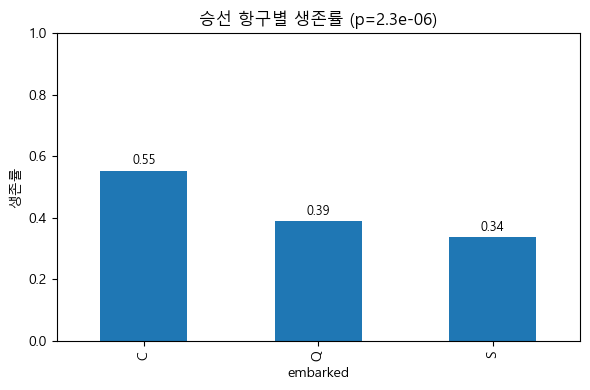

survived,0,1
embarked,,
C,75,93
Q,47,30
S,427,219


In [43]:

emb_surv = df.groupby('embarked')['survived'].mean()
p_emb, ct_emb = chi2_pvalue(df['embarked'], df['survived'])

fig, ax = plt.subplots(1,1, figsize=(6,4))
emb_surv.plot(kind='bar', ax=ax)
ax.set_title(f'승선 항구별 생존률 (p={p_emb:.3g})')
ax.set_ylim(0,1); ax.set_ylabel('생존률')
add_value_labels(ax)
plt.tight_layout(); plt.show()

display(ct_emb)


    ## 7) 최종 요약 테이블

In [45]:

summary = pd.DataFrame([
    ['성별', 'sex × survived', p_sex],
    ['객실 등급', 'pclass × survived', p_pclass],
    ['성별×등급 조합', 'sex_pclass × survived', p_sex_pclass],
    ['가족 규모', 'family_size × survived', p_family],
    ['승선 항구', 'embarked × survived', p_emb],
], columns=['주제','검정','p-value']).sort_values('p-value')

summary

,주제,검정,p-value
2,성별×등급 조합,sex_pclass × survived,1.252307e-73
0,성별,sex × survived,1.197357e-58
1,객실 등급,pclass × survived,4.549252e-23
3,가족 규모,family_size × survived,9.866171e-08
4,승선 항구,embarked × survived,2.300863e-06
